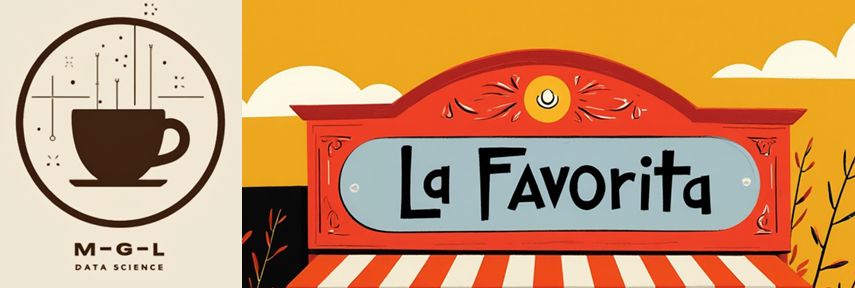

#               **LA FAVORITA STORES SALES:**

# *A PRACTICE OF DATA ANALYSIS AND MODEL TRAINING*

# Case Presented:

The Following Notebook and Data Analysis / Model Creation Project is Based on Kaggle Open Challenge : ["Store Sales"](https://www.kaggle.com/c/store-sales-time-series-forecasting/overview)

Here is the Challenge Description:   

**Description**

**Goal of the Competition**
In this “getting started” competition, you’ll use time-series forecasting to forecast store sales on data from Corporación Favorita, a large Ecuadorian-based grocery retailer.

Specifically, you'll build a model that more accurately predicts the unit sales for thousands of items sold at different Favorita stores. You'll practice your machine learning skills with an approachable training dataset of dates, store, and item information, promotions, and unit sales


**Context**

Forecasts aren’t just for meteorologists. Governments forecast economic growth. Scientists attempt to predict the future population. And businesses forecast product demand—a common task of professional data scientists. Forecasts are especially relevant to brick-and-mortar grocery stores, which must dance delicately with how much inventory to buy. Predict a little over, and grocers are stuck with overstocked, perishable goods. Guess a little under, and popular items quickly sell out, leading to lost revenue and upset customers. More accurate forecasting, thanks to machine learning, could help ensure retailers please customers by having just enough of the right products at the right time.

Current subjective forecasting methods for retail have little data to back them up and are unlikely to be automated. The problem becomes even more complex as retailers add new locations with unique needs, new products, ever-transitioning seasonal tastes, and unpredictable product marketing.

**Potential Impact**

If successful, you'll have flexed some new skills in a real world example. For grocery stores, more accurate forecasting can decrease food waste related to overstocking and improve customer satisfaction. The results of this ongoing competition, over time, might even ensure your local store has exactly what you need the next time you shop.

**Dataset Description**
<br>
<br>
The training data includes dates, store and product information, whether that item was being promoted, as well as the sales numbers. Additional files include supplementary information that may be useful in building your models.
<br>
<br>

**File Descriptions and Data Field Information** (as per original descriptions)
<br>
<br>
**train.csv**
<br>

The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.
store_nbr identifies the store at which the products are sold.
family identifies the type of product sold.
sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
onpromotion gives the total number of items in a product family that were being promoted at a store at a given date.
<br>
<br>

**test.csv**
<br>

The test data, having the same features as the training data. You will predict the target sales for the dates in this file.
The dates in the test data are for the 15 days after the last date in the training data.
sample_submission.csv
A sample submission file in the correct format.
stores.csv
Store metadata, including city, state, type, and cluster.
cluster is a grouping of similar stores.
<br>
<br>

**oil.csv**
<br>

Daily oil price. Includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)
holidays_events.csv
Holidays and Events, with metadata
NOTE: Pay special attention to the transferred column. A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer. For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.
Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).

## Personal Considerations

This project was elaborate in Google Colab as to facilitate the development in more than one location using Google Drive for files managment for simplicity. By making small ajustments in "Data Analysis: Loading Data" section, it is simple to run in a local environment.

Comment: Multiple copies of data frames were made in the following notebook instead of a more optiomal number preserving memory while preserving original data, this choice was made in the considerations that:

*Even doing so the memory impact was marginal
*Since this is an educational notebook doing so allows to backtrack more easely into "previous" steps if needed for review purposes

# Libraries

## Rebooting Libraries

Given that it was chosen to perform this particular project in Google Colab Notebooks, we first need to install the libraries if any that require reboot in Colab's Environment as avoid having to install any other libraries multiple times.  

In [ ]:
#Instaling libraries that require reboot in Colab:

!pip install -U kaleido #Imported os for trouble shooting exporting images
import os
os.kill(os.getpid(), 9)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.7 MB/s eta 0:00:00


## Importing Required Libraries

In [2]:
from google.colab import drive                          #Mounting Drive Into Notebook for use

import pandas as pd                                     #Main Data Frame Handling Library
import numpy as np                                      #Multi AArray processiong library

!pip install plotly                                     #Graph and Visualization Library 1 : Flexible Visuals
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.express as px

import matplotlib.pyplot as plt                         #Graph and Visualizarion Library 2: Flexible Visuals

import calendar                                         #Library to suport time series analysis

import seaborn as sns                                   #Graph and Visualization Library 3: Statistics Support

from sklearn.preprocessing import LabelEncoder          #Preprocessing Data: Encoding Data and Rescalling Data
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV, train_test_split  #Model Tuning training split and Grid Search

from scipy.optimize import curve_fit                    #Library to support curve fittings

!pip install xgboost                                    #Regressor Models Outside Sklearn Considered in the Search for Best Model
!pip install lightgbm
import xgboost as xgb
import lightgbm as lgb

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor      #Regressor Models Inside Sklearn Considered in the Search for Best Model
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge       #Regression Models

from sklearn.metrics import  make_scorer  #Model Evaluation Metrics Used

import gc                                               # Import garbage collector to free memory as needed

import time                                             #Training Time Visualization to evaluated model training performance


## Disabling History of Data for memory eficiency:

In [3]:
%config Completer.use_jedi = False

# DATA ANALYSIS

## Data Analysis : Loading Data




### Mounting Drive Folder Containing the Raw Data





In [4]:
drive.mount('/content/drive')           #Mounting Drive
!pwd
%cd /content/drive/My\ Drive/PROGRAMAS

#Establishing Path to the Correct Folder
# == %cd /content/drive/My\ Drive/"Folder Containing Raw Data"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
/content/drive/My Drive/PROGRAMAS


### Importing Raw Data

In [5]:
df0 = pd.read_csv('PYDATASCI/Store Sales/train.csv')                    #Series of Features with Sales Data for Training
dfStores=pd.read_csv('PYDATASCI/Store Sales/stores.csv')                #Stores Information (Type,Cluster,Location)
dfOil=pd.read_csv('PYDATASCI/Store Sales/oil.csv')                      #Oil Prices Data
dfHolidays=pd.read_csv('PYDATASCI/Store Sales/holidays_events.csv')     #Local Holidays Events Table
dfTransactions=pd.read_csv('PYDATASCI/Store Sales/transactions.csv')    #Transaction Volumes Table
dfTest=pd.read_csv('PYDATASCI/Store Sales/test.csv')                    #Series of Features with Sales Data for Training

## Data Analysis: Data First Look

### First Look Main Data Frame

In [6]:
df0.head(3)    #Quick Peak in Main DataFrame Features

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0


In [7]:
df0.dtypes #Understanding Data Frame Columns Types

,0
id,int64
date,object
store_nbr,int64
family,object
sales,float64
onpromotion,int64


In [8]:
df0.describe()    #Further Understanding of Data of Main Data Frame

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [9]:
df0.shape #Sizing the Volume of Data with Have

(3000888, 6)

### First Look Stores Data Frame

In [10]:
dfStores.head(3)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8


In [11]:
dfStores.dtypes #Understanding Data Frame Columns Types

,0
store_nbr,int64
city,object
state,object
type,object
cluster,int64


### First Look Oil Data Frame

In [12]:
dfOil.head(3)  #Quick Peak in Oil DataFrame Features

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97


In [13]:
dfOil.dtypes #Understanding Data Frame Columns Types

,0
date,object
dcoilwtico,float64


### First Look Holidays Data Frame

In [14]:
dfHolidays.head(3) #Quick Peak in Holidays DataFrame Features

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False


In [15]:
dfHolidays.dtypes #Understanding Data Frame Columns Types

,0
date,object
type,object
locale,object
locale_name,object
description,object
transferred,bool


In [16]:
dfTest.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


Considerations After First Look:



*   Apart for eventuals manipulations in Date Columns to extract time series information out of it, all data types present themselves with the correct type
*   There are many object types of data across all date frames, therefore it is expected to be required a large volume of encondings which can afect the running time of the models. Something to look out for
*   The main Data frame is of a medium to large size with 3 million lines. So adding such to the previous consideration memory performance is going to need to be closely looked at.



## Data Analysis: Presenting non Time Related Variables


  I started simply presenting the categorical variables most relevant by my standards and non changing over time such as how many stores belong to the chain to be analised.

  The Figure Choice for such presentation was merely a seized oportunity to practice plotly's library as in the core this is a learning exercise

In [17]:
#Defining range of multiple variables that may affect our model

NumStore=dfStores["store_nbr"].nunique()
States=dfStores["state"].nunique()
ProductsClass=df0["family"].nunique()
Cities=dfStores["city"].nunique()
StoreTypes=dfStores['type'].nunique()

In [18]:
%matplotlib inline
fig=go.Figure()                                                                 #Create Figure to present the ranges aquired
fig.add_trace(go.Scatter(
    x=[0, 1, 2, 0.5, 1.5],
    y=[2.1, 2.1, 2.1, 0.7, 0.7],
    mode="text",
    text=["<span style='font-size:33px'><b>"+str(NumStore)+"</b></span>",       #Establishing the text containing the counts performed of previous cell
          "<span style='font-size:33px'><b>"+str(ProductsClass)+"</b></span>",
          "<span style='font-size:33px'><b>"+str(States)+"</b></span>",
          "<span style='font-size:33px'><b>"+str(Cities)+"</b></span>",
          "<span style='font-size:33px'><b>"+str(StoreTypes)+"</b></span>"],
    textposition="bottom center"
    )
)

fig.add_trace(go.Scatter(                                                       #Setting Figure
x=[0, 1, 2, 0.5, 1.5],
    y=[1.6, 1.6, 1.6, 0.2, 0.2],
    mode="text",
    text=["Stores", "Products", "States", "Cities", 'Store Types'],             #Naming the variables in fig
    textposition="bottom center"
))
fig.add_hline(y=2.5, line_width=9, line_color='gray')                           #Setting aestetic lines in figure
fig.add_hline(y=-0.3, line_width=9, line_color='grey')
fig.update_yaxes(visible=False)
fig.update_xaxes(visible=False)
fig.update_layout(showlegend=False, height=300, width=700,
                  title='La Favorita Stores <br> Locations and Classes <br> Summary', title_x=0.5, title_y=0.9, #Setting Title Across Multiple lines
                  xaxis_range=[-0.5,2.6], yaxis_range=[-0.5,3.2],                                               #Setting Layout dimensions
                  plot_bgcolor=' #FFFDD0', paper_bgcolor=' #FFFDD0',                                              #Setting Figure Color
                  font=dict(size=20, color='#323232'),
                  title_font=dict(size=30, color='#222'),
                  margin=dict(t=90,l=70,b=0,r=70),
    )

fig.write_image("PYDATASCI/Store Sales/La FavoritaStore Sumary.png",format='png',engine='kaleido') #Export the image for later report usage if needed
fig.show()

## Data Analysis: Merging the data sets

Since in the following section my intent is to define the relationship between variables:

*   All data was merged to facilitate such.
*    I allowed this since the data dimensions are in the mid size range (previous to any encoding at least) and therefore runtimes for this operations would not be a concern.
* Some columns such as "locale_name" could already be intuitevely droped, but the purpose of the following section is to define which data is relevant in a analical fashion rather that intuitive fashion (again a choice made by the learning nature of this notebook) and therefore were not droped yet.

In [19]:
df_merged = df0.merge(dfHolidays, on = 'date', how='left')                                  #Performing Merge of Raw datas
df_merged = df_merged.merge(dfOil, on = 'date', how='left')
df_merged = df_merged.merge(dfStores, on = 'store_nbr', how='left')
df_merged = df_merged.merge(dfTransactions, on = ['date', 'store_nbr'], how='left')
df_merged = df_merged.rename(columns = {"type_x" : "holiday_type", "type_y" : "store_type"})

                                                                                            #Creating the year, quarter, month a day columns.

df_merged['date'] = pd.to_datetime(df_merged['date'])
df_merged['year'] = df_merged['date'].dt.year
df_merged['month'] = df_merged['date'].dt.month
df_merged['day']= df_merged['date'].dt.day
df_merged['week'] = df_merged['date'].dt.isocalendar().week
df_merged.week.astype(float)
df_merged['quarter'] = df_merged['date'].dt.quarter
df_merged['day_of_week'] = df_merged['date'].dt.day_name()
print(df_merged.shape)
df_merged.head(3)                                                                          #Obs: Colab 4Gb ram: Runtime 13 s

(3054348, 23)


,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,...,state,store_type,cluster,transactions,year,month,day,week,quarter,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,Pichincha,D,13,NaN,2013,1,1,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,Pichincha,D,13,NaN,2013,1,1,1,1,Tuesday
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,Pichincha,D,13,NaN,2013,1,1,1,1,Tuesday


###Variables involved in Merged Set


A quick peak in the data after the merge to indentify if any unpredicted mistakes occured

In [20]:
df_merged.dtypes

,0
id,int64
date,datetime64[ns]
store_nbr,int64
family,object
sales,float64
onpromotion,int64
holiday_type,object
locale,object
locale_name,object
description,object


In [21]:
df_merged.describe()

,id,date,store_nbr,sales,onpromotion,dcoilwtico,cluster,transactions,year,month,day,week,quarter
count,3.054348e+06,3054348,3.054348e+06,3.054348e+06,3.054348e+06,2.099196e+06,3.054348e+06,2.805231e+06,3.054348e+06,3.054348e+06,3.054348e+06,3054348.0,3.054348e+06
mean,1.504277e+06,2015-04-26 12:11:45.717619200,2.750000e+01,3.590209e+02,2.617480e+00,6.801587e+01,8.481481e+00,1.697071e+03,2.014842e+03,6.222870e+00,1.565694e+01,25.308635,2.413652e+00
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,2.619000e+01,1.000000e+00,5.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,1.0,1.000000e+00
25%,7.546768e+05,2014-03-01 00:00:00,1.400000e+01,0.000000e+00,0.000000e+00,4.641000e+01,4.000000e+00,1.046000e+03,2.014000e+03,3.000000e+00,8.000000e+00,13.0,1.000000e+00
50%,1.507572e+06,2015-04-28 12:00:00,2.750000e+01,1.100000e+01,0.000000e+00,5.343000e+01,8.500000e+00,1.395000e+03,2.015000e+03,6.000000e+00,1.600000e+01,25.0,2.000000e+00
75%,2.255120e+06,2016-06-22 00:00:00,4.100000e+01,1.960110e+02,0.000000e+00,9.581000e+01,1.300000e+01,2.081000e+03,2.016000e+03,9.000000e+00,2.300000e+01,38.0,3.000000e+00
max,3.000887e+06,2017-08-15 00:00:00,5.400000e+01,1.247170e+05,7.410000e+02,1.106200e+02,1.700000e+01,8.359000e+03,2.017000e+03,1.200000e+01,3.100000e+01,53.0,4.000000e+00
std,8.662610e+05,NaN,1.558579e+01,1.107286e+03,1.225494e+01,2.569134e+01,4.649735e+00,9.668317e+02,1.345607e+00,3.374251e+00,8.801398e+00,14.750509,1.095690e+00


## Data Analysis: Understanding the Dependency of Variables

### Pre dependecy analysis:


Here list's are created to separate data frames distinguishing quantitative and categorical data.
<br>
<br>
This was performed to support wrangling and understanding of data.



In [22]:
ql = []                                      #Creatin empty lists for numerical and categorical data names.
qt = []

for i in df_merged.dtypes.index:              #Iterations over data typed contained in the data set creating a list of numerical and categorical names
    if df_merged.dtypes[i] == 'object':
        ql.append(i)
    else:
        qt.append(i)
print('Numerical Variables: ',qt)
print('Categorical Variables: ',ql)
dfqt=df_merged[qt]                           #Using Lists to split main data frame merged in categorical and numerical set.
dfql=df_merged[ql]


Numerical Variables:  ['id', 'date', 'store_nbr', 'sales', 'onpromotion', 'dcoilwtico', 'cluster', 'transactions', 'year', 'month', 'day', 'week', 'quarter']
Categorical Variables:  ['family', 'holiday_type', 'locale', 'locale_name', 'description', 'transferred', 'city', 'state', 'store_type', 'day_of_week']


### Looking at clustering variables:

 Store Types  
 Product Categories  
 Stores Clusters


In [23]:
%matplotlib inline
#Grouping Data for Ploting :

dfStoresSales = df_merged.groupby('store_type').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)
dfProductsCategories = df_merged.groupby('family').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)[:10]
dfClusterSales = df_merged.groupby('cluster').agg({"sales" : "mean"}).reset_index()


#Setting Colors for the charts

dfProductsCategories['color']= ['#9b2c4b','#ab3254','#b43659','#be3a5f','#c83e64','#d14169','#d8446d','#e14873','#ea4c78','#f34f7d']

dfClusterSales['color'] = ['#2a457a','#345494','#3f5b93','#4b669d','#1b5ad9','#0e4cc9',
'#5e7ab0','#4268b6','#688acf','#2f61c6 ','#3b5da0','#4879dc','#6086d4','#154ab6','#3168d7','#325eb7 '
,'#4364a6']

dfStoresSales['color'] = ['#459cd0','#45d0a2','#a345d0','#d0cb45','#d05b45']

# Establishing Subplots:

fig = sp.make_subplots(rows=2, cols=2,
                    specs=[[{"type": "bar"}, {"type": "pie"}],
                           [{"colspan": 2}, None]],
                    column_widths=[0.7, 0.3], vertical_spacing=0, horizontal_spacing=0.02,
                    subplot_titles=("Top Selling Products Sales by Category", "Sales in Stores by Type", "Sales by Clusters"))

# Populating Subplots:

fig.add_trace(go.Bar(x=dfProductsCategories['sales'], y=dfProductsCategories['family'], marker=dict(color= dfProductsCategories['color']),
                     name='Family', orientation='h'),
                     row=1, col=1)
fig.add_trace(go.Pie(values=dfStoresSales['sales'], labels=dfStoresSales['store_type'], name='Stores type',
                     marker=dict(colors=dfStoresSales['color']), hole=0.6,
                     hoverinfo='label+percent+value', textinfo='label+percent'),
                    row=1, col=2)
fig.add_trace(go.Bar(x=dfClusterSales['cluster'], y=dfClusterSales['sales'],
                     marker=dict(color= dfClusterSales['color']), name='Cluster'),
                     row=2, col=1)

# Updating Template

fig.update_yaxes(showgrid=False, ticksuffix=' ', categoryorder='total ascending', row=1, col=1)
fig.update_xaxes(visible=False, row=1, col=1)
fig.update_xaxes(tickmode = 'array', tickvals=dfClusterSales.cluster, ticktext=[i for i in range(1,17)], row=2, col=1)
fig.update_yaxes(visible=False, row=2, col=1)
fig.update_layout(height=500, bargap=0.2,
                  margin=dict(b=0,r=20,l=20), xaxis=dict(tickmode='linear'),
                  title_text="Mean Sales Analysis, Cluster/Product Type/Store Type", title_x=0.5,
                  template="plotly_white",
                  title_font=dict(size=29, color='#8a8d93', family="Lato, verdana"),
                  font=dict(color='#8a8d93'),
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=11, font_family="Lato, verdana"),
                  showlegend=False)


fig.write_image("PYDATASCI/Store Sales/Mean Sales By Store Products,Clusters,Types.png",format='png',engine='kaleido')
fig.show()

Clustering Data Analysis Points:
<br>


*   Out of the 33 Product Categories, 7 categories that can contain perishable products are within the top 10 selling categories. As our target metric of evaluation attributes more weight towards such products this is a finding to keep in mind. Also this is a variables to be kept giving it's behaviour.
*   There are observable diferences in sales by cluster, therefore this will be a variable to maintain in our model.
* There are observable diferences in sales by store type, therefore this will be a variable to maintain in our model.
* The category behaviour appears to be exponential, so a fit of this behaviour is made bellow to evaluate it.



In [24]:
%matplotlib inline
# Grouping & Sorting Data
dfProductsCategories = df_merged.groupby('family').agg({"sales": "sum"}).reset_index()
dfProductsCategories = dfProductsCategories.sort_values(by='sales', ascending=False)

# Extract X (categories) and Y (sales)
categories = dfProductsCategories['family']
sales = dfProductsCategories['sales']

# Fit Exponential Line using only the first 15 categories. These were selected given the bias lower categories were producing
num_fit = 15  # Number of categories for fitting
x_fit = np.arange(1, num_fit + 1)  # Numeric indices for first 15 categories
y_fit = sales[:num_fit]  # Sales for first 15 categories

# Define Exponential Function: y = a * exp(b * x)
def exp_func(x, a, b):
    return a * np.exp(b * x)

# Fit the exponential function
params, _ = curve_fit(exp_func, x_fit, y_fit, maxfev=5000)  # Increased max function evaluations

# Generate fitted values for all categories using the first 15's fit
x_numeric = np.arange(1, len(sales) + 1)
exp_fit = exp_func(x_numeric, *params)

# Create Figure
fig = go.Figure()

# Add Bar Chart (All Categories)
fig.add_trace(go.Bar(
    x=categories,
    y=sales,
    marker=dict(color='skyblue'),
    name="Mean Sales by Category"
))

# Add Exponential Trend Line (Fitted on first 15 categories)
fig.add_trace(go.Scatter(
    x=categories,
    y=exp_fit,
    mode='lines',
    line=dict(color='red', dash='dash'),
    name="Exponential Fit (Top 15 Categories)"
))

# Update Layout

fig.update_layout(
    title="Product Categories Ranked by Sales with Exponential Trend (Fit on Top 15)",
    title_x=0.5,
    xaxis=dict(title="Product Category", tickangle=-45),  # Rotate labels for better visibility
    yaxis=dict(title="Total Sales"),
    template="plotly_white"
)

# Show Figure
fig.show()


Correctly predicting the sales of the first 15 products will dictate most of the model performance given this result.

### Heatmap Analysis:

Heatmaps are made in order to observe if any variable presents from the start considerable correlation with the sales.

* Since in this maps we are concerned with the sales variable, the columns were divided it two data sets before plotting in order to enhance compreension of the maps.
* The full heatmap was still plotted in a attempt the detect hidden redundant variables.

<Axes: >

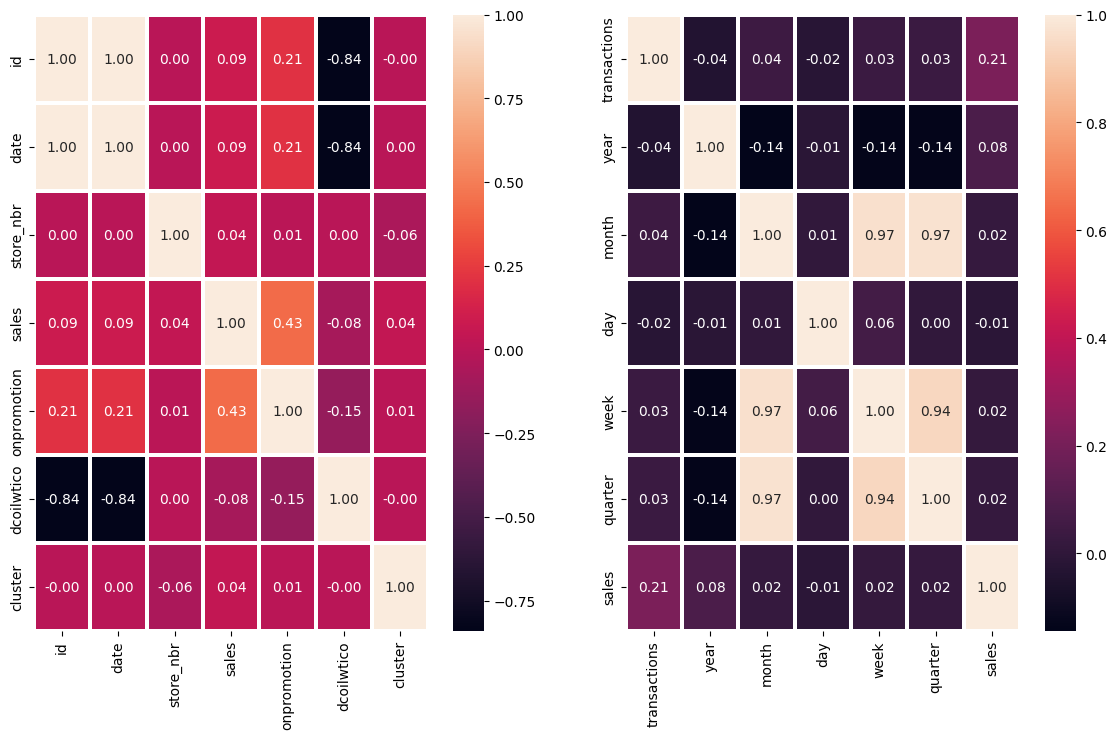

In [25]:
%matplotlib inline
df_merged1=df_merged[qt]          #Create Dateframe with only numerical atributes.
df_merged2=pd.DataFrame()
df_merged3=pd.DataFrame()
x=0
for i in df_merged1 :
  if x<=6:
    df_merged2[i]=df_merged1[i]   #Subdivide further into two dataframe both containing sales for better visualization focused on sales.
  if x>6:
    df_merged3[i]=df_merged1[i]
  x+=1
df_merged3['sales']=df_merged1["sales"]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,8))

sns.heatmap(df_merged2.corr(), annot = True, linewidths=1.5 , fmt = '.2f',ax=ax1) #Plot the subheatmaps
sns.heatmap(df_merged3.corr(), annot = True, linewidths=1.5 , fmt = '.2f',ax=ax2)


The full heatmap to not miss redundancies in variables if there are any:

<Axes: >

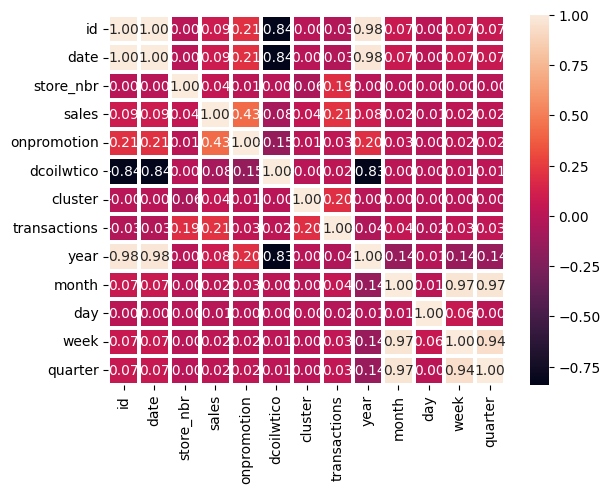

In [26]:
%matplotlib inline

fig = plt.plot(figsize=(34,28))
sns.heatmap(df_merged1.corr(), annot = True, linewidths=1.5 , fmt = '.2f')

Heatmap Points:
<br>
<br>



*   From the heatmaps we can notice a surprising lack of strong correlations between sales and other numerical variables. With onpromotion beeing (as one would expect) the strongest with 0.43
*   As far as week correlations go, we can observe very low values with all time variables below 0. except for year at 0.14, inviting a closer inspection of these variables as this exercise revolves around time series fore casting. The full date however caries a stronger correlation of 0.21 (the second highest with sales)
* ID and Date are redundant as seen from the last heatmap. So we can consider eliminating ID column for faster processing if we do not chose to use it as index.



### Time-Series Variables General Analysis

We start to investigate further into the time-series variables with visualizations.
<br>
<br>
 The sum metric was chosen to observe yearly behaviour while mean was chosen for the remaining time-series variables. This first creating grouped dataframes with week, month, quarter and year overhaull behaviour as the target of analysis.

In [27]:
%matplotlib inline

# Merging the data

df_w_sales = df_merged.groupby('week').agg({"sales": "mean"}).reset_index()
df_m_sales = df_merged.groupby('month').agg({"sales": "mean"}).reset_index()
df_q_sales = df_merged.groupby('quarter').agg({"sales": "mean"}).reset_index()
df_y_sales = df_merged.groupby('year').agg({"sales": "sum"}).reset_index()


# Defining Function to add traces and annotations pointing max and min values

def add_trace_with_annotations(fig, df, x_col, y_col, row, col, color, name):
    fig.add_trace(go.Scatter(x=df[x_col], y=df[y_col], mode='lines+markers', fill='tozeroy',
                             fillcolor=color, marker=dict(color=color), name=name,
                             hovertext=df[y_col]), row=row, col=col)

    max_idx = df[y_col].idxmax()
    min_idx = df[y_col].idxmin()

    max_x, max_y = df[x_col][max_idx], df[y_col][max_idx]
    min_x, min_y = df[x_col][min_idx], df[y_col][min_idx]

    fig.add_annotation(x=max_x, y=max_y, text=f"Max: {max_y.round(1)}", showarrow=True, arrowhead=2, row=row, col=col)
    fig.add_annotation(x=min_x, y=min_y, text=f"Min: {min_y.round(1)}", showarrow=True, arrowhead=2, row=row, col=col)


# Define function to Calculate padding for each dataset
def get_x_range(df, x_col, padding_ratio=0.05):
    x_min, x_max = df[x_col].min(), df[x_col].max()
    padding = (x_max - x_min) * padding_ratio  # 5% padding
    return [x_min - padding, x_max + padding]


In [28]:
%matplotlib inline

# Setting the subplots of Week and Month Sales :

fig = sp.make_subplots(rows=2, cols=1, vertical_spacing=0.15,
                       row_heights=[0.5, 0.5],
                       specs=[[{}], [{}]],
                       subplot_titles=("Week Wise Mean Sales Analysis", "Month Wise Mean Sales Analysis"))

# Updating layout
fig.update_layout(title='Time Sales Analysis', title_x=0.5, template="plotly_white",
                  margin=dict(l=0, r=50, t=100, b=10), showlegend=False)

# Adding traces with function
add_trace_with_annotations(fig, df_w_sales, 'week', 'sales', 1, 1, '#ed0909', 'Week')
add_trace_with_annotations(fig, df_m_sales, 'month', 'sales', 2, 1, '#addb14', 'Month')

#Adding Paddings
fig.update_xaxes(range=get_x_range(df_w_sales, 'week'), row=1, col=1)
fig.update_xaxes(range=get_x_range(df_m_sales, 'month'), row=2, col=1)

# Show the plot
fig.show()


In [29]:
%matplotlib inline

# Setting the subplots of Quarte and Year Sales :

fig = sp.make_subplots(rows=2, cols=1, vertical_spacing=0.15,
                       row_heights=[0.5, 0.5],
                       specs=[[{}], [{}]],
                       subplot_titles=("Quarter Wise Mean Sales Analysis", 'Year Wise Total Sales Analysis'))


# Adding traces and annotations
add_trace_with_annotations(fig, df_q_sales, 'quarter', 'sales', 1, 1, '#1e14db', 'Quarter')
add_trace_with_annotations(fig, df_y_sales, 'year', 'sales', 2, 1, '#796595', 'Year')

# Updating layout
fig.update_layout(title='Time Sales Analysis', title_x=0.5, template="plotly_white",
                  margin=dict(l=0, r=50, t=100, b=10), showlegend=False)


# Updating X-axis ticks for year and quarter charts that were being set every half tick

fig.update_xaxes(dtick=1, row=1, col=1)  # Quarter chart
fig.update_xaxes(dtick=1, row=2, col=1)  # Year chart

#Adding Paddings
fig.update_xaxes(range=get_x_range(df_q_sales, 'quarter'), row=1, col=1)
fig.update_xaxes(range=get_x_range(df_y_sales, 'year'), row=2, col=1)

fig.show()

We observe at this first time dependency approach:   
   
   


*   A tendency of sales grown year by year doubling total sales between 2013 and 2016, the 2017 results need to be analysed with caution given that the data set does not possess Sales Information of the Last 3 month of that year.
*   Sales are observed weekly and monthly but without any requiring excessive inquiry.
* As far as overhall behavior goes within a given year, we observe small trend of increase in sales towards the end of the year.



In [30]:
%matplotlib inline

# Merging Data By Day of Week
df_dow_sales = df_merged.groupby('day_of_week').agg({"sales": "mean"}).reset_index()

# Normalize values between 0 and 1 for colorscale mapping
normalized_sales = (df_dow_sales['sales'] - df_dow_sales['sales'].min()) / (df_dow_sales['sales'].max() - df_dow_sales['sales'].min())

# Generate colors using Plotly's built-in colorscale (e.g., "Blues" or "Viridis") to establish gradient.
dow_colors = [px.colors.sample_colorscale("Blues", v)[0] for v in normalized_sales]

# Creating Subplot with ONLY Week Day Sales Analysis
fig = sp.make_subplots(
    rows=1, cols=1,
    specs=[[{"type": "pie"}]],
    subplot_titles=("Week Day Avg Sales Analysis",)
)

# Add Pie Chart for Days of the Week
fig.add_trace(go.Pie(
    values=df_dow_sales['sales'],
    labels=df_dow_sales['day_of_week'],
    name='Day Of Week',
    marker=dict(colors=dow_colors),  # Calling Gradient colors
    hole=0.7,
    hoverinfo='label+percent+value',
    textinfo='label+percent'
), row=1, col=1)

# Update Layout
fig.update_layout(
    title='Mean Sales by Day Of Week',
    title_x=0.5,
    template="plotly_white",
    margin=dict(l=0, r=50, t=100, b=10),
    showlegend=False
)

# Save as Image
fig.write_image("PYDATASCI/Store Sales/Mean Sales by Day Of Week.png", format='png', engine='kaleido')

# Show Figure
fig.show()

Freing Memory for Efficiency

In [31]:
# List of DataFrames to delete
df_remove_list = [df_m_sales, df_dow_sales, df_y_sales, df_q_sales, df_w_sales]

# Delete each DataFrame
for df in df_remove_list:
    del df

# Force garbage collection to free memory
gc.collect()

2221

We observed that weekend's have a higher tendency of sells while thursday's have a lower tendency. Given that proportionaly this difference is as high as 62%. This variable is to be kept as well in model making.

# DATA WRANGLING

## Data Wrangling:Dealing with Null Values

### **Evaluating the Total Null's**

In [32]:
df_nan = pd.DataFrame(df_merged.isna().sum()).reset_index().rename(columns = {0:'Total Null Values', 'index': 'Column Name'})
df_nan

,Column Name,Total Null Values
0,id,0
1,date,0
2,store_nbr,0
3,family,0
4,sales,0
5,onpromotion,0
6,holiday_type,2551824
7,locale,2551824
8,locale_name,2551824
9,description,2551824


In [33]:
#Below a snipet to determine the number of sales values = zero. The next markdowns explains further.

Sales_Equal_to_zero=0
for i in df_merged['sales']:
  if i==0:
    Sales_Equal_to_zero+=1
Sales_Equal_to_zero

953741

Lets Understand our Null values.  

First transactions, we observe that only 3248/249117=1.3% are actualy missing values from the fact that sales doesnt have NaN armed with the fact that when there aren't transactions, there aren't sales. So we fill all but these 3248 NaN's with 0.

Obs: 'Transactions' is a variable witch will not be presented in our test data, so if we want to determine sales, we could simply drop said columns. However, since:

1) At a first glance the correlation between transactions and the remaining variables appear to be better than the correlation on sale with such variables.

2) The highest correlation of sales is with 'transaction'.

For learning purposes i decided to deal with transactions as a present variable, in order to further down the line maintain the option to work with said column



In [34]:
#Filling transactions column with 0 were sales = 0

df_merged.iloc[df_merged['sales'] == 0, 16] = 0

df_nan = df_merged.isna().sum().reset_index().rename(columns={0: 'Total Null Values', 'index': 'Column Name'})
df_nan

,Column Name,Total Null Values
0,id,0
1,date,0
2,store_nbr,0
3,family,0
4,sales,0
5,onpromotion,0
6,holiday_type,2551824
7,locale,2551824
8,locale_name,2551824
9,description,2551824


Now we have to Deal with the remaining 3248. We see that already the correlation between Transaction and other variables grew. With special attention to the correclation with sales (from 0.21 to 0.31 after fillings)

Corr before drop


<Axes: >

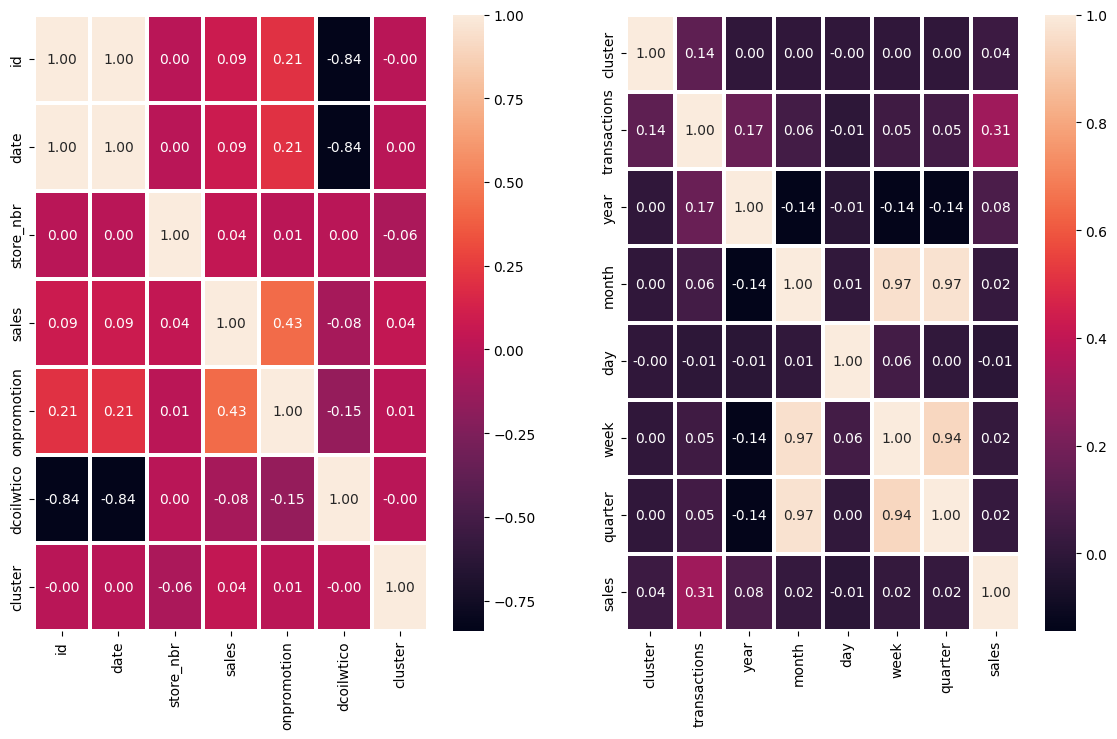

In [35]:
%matplotlib inline

# Create a copy of the original DataFrame to work on without modifying the original
df_merged2 = df_merged.copy()

# Create a new DataFrame to analyze missing values in the 'transactions' column
df_nan2 = pd.DataFrame(df_merged2.transactions.isna().reset_index())

# Add the 'sales' column to df_nan2 for reference
df_nan2["sales"] = df_merged2['sales']

# Add the 'transactions' column to df_nan2 for reference
df_nan2["TransactionsN"] = df_merged2['transactions']

# Initialize empty lists to categorize column names based on their data type
ql = []  # Stores object (categorical) column names
qt = []  # Stores numerical column names

# Iterate through the DataFrame column names and categorize them based on their data type
for i in df_merged2.dtypes.index:
    if df_merged2.dtypes[i] == 'object':  # If column is categorical, add to ql
        ql.append(i)
    else:  # If column is numerical, add to qt
        qt.append(i)

# Create DataFrames with only numerical and categorical columns
dfqt = df_merged2[qt]  # DataFrame with numerical columns
dfql = df_merged2[ql]  # DataFrame with categorical columns

# Initialize two DataFrames for further numerical column processing
df_mergedc1 = df_merged2[qt]  # Copy of numerical columns
df_mergedc2 = pd.DataFrame()  # Will store the first subset of numerical columns
df_mergedc3 = pd.DataFrame()  # Will store the second subset of numerical columns

# Initialize counter
x = 0

# Split numerical columns into two DataFrames
for i in df_mergedc1:
    if x <= 6:  # First 7 columns go into df_mergedc2
        df_mergedc2[i] = df_mergedc1[i]
    if x > 5:  # Remaining columns go into df_mergedc3
        df_mergedc3[i] = df_mergedc1[i]
    x += 1

# Ensure 'sales' column is included in df_mergedc3
df_mergedc3['sales'] = df_mergedc1["sales"]

# Create a figure with two subplots (side by side) of size (14,8)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

# Print the title to compare before and after drop of transaction remaining null line.
print('Corr before drop')

# Generate heatmaps for the two DataFrames containing numerical columns
sns.heatmap(df_mergedc2.corr(), annot=True, linewidths=1.5, fmt='.2f', ax=ax1)  # First subset
sns.heatmap(df_mergedc3.corr(), annot=True, linewidths=1.5, fmt='.2f' , ax=ax2)  # Second subset

We test now if dropping the remaining null value lines with significantly impact the correlation matrix:

          coluna  total_nan
0             id          0
1           date          0
2      store_nbr          0
3         family          0
4          sales          0
5    onpromotion          0
6   holiday_type    2548605
7         locale    2548605
8    locale_name    2548605
9    description    2548605
10   transferred    2548605
11    dcoilwtico     953171
12          city          0
13         state          0
14    store_type          0
15       cluster          0
16  transactions          0
17          year          0
18         month          0
19           day          0
20          week          0
21       quarter          0
22   day_of_week          0
Corr after drop


<Axes: >

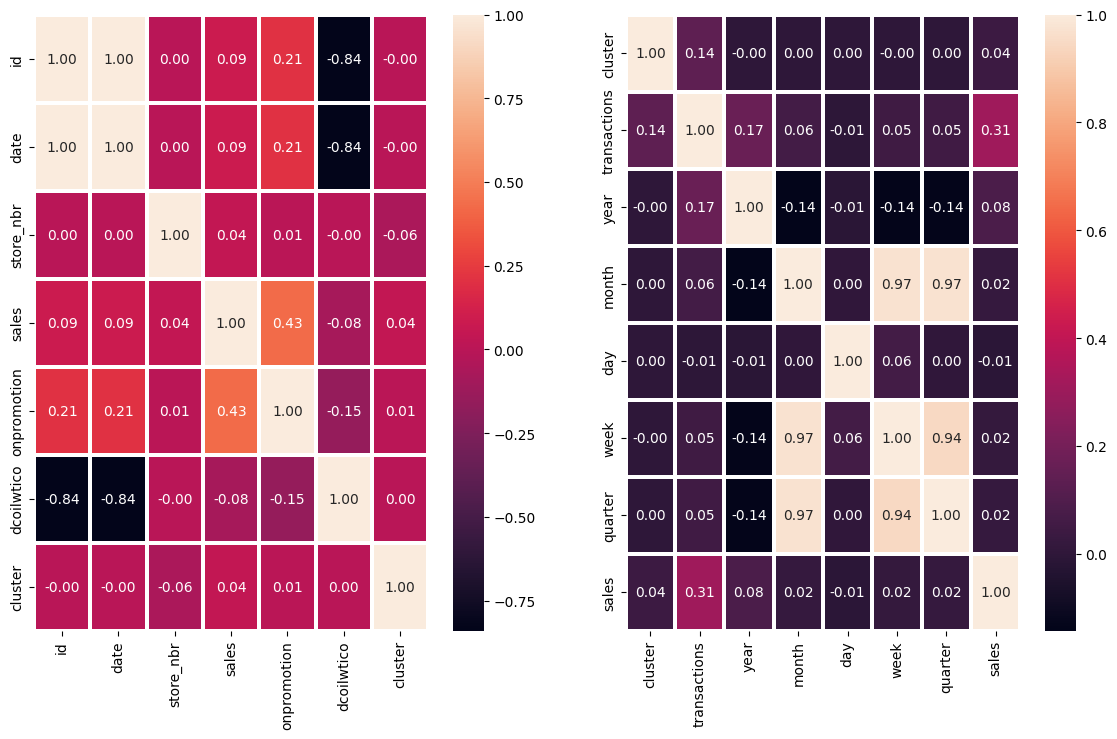

In [36]:
%matplotlib inline

# Create a copy of df_merged2 to work with, preserving the original data
df_mergedDrop = df_merged2.copy()

# Drop rows where the 'transactions' column has missing (NaN) values
df_mergedDrop = df_mergedDrop.dropna(subset=['transactions'])

# Create a DataFrame to count the number of missing values in each column
df_nan3 = pd.DataFrame(df_mergedDrop.isna().sum()).reset_index().rename(columns={0: 'total_nan', 'index': 'coluna'})

# Verify that there are no more null values in 'Transactions'
print(df_nan3)

# Print a message indicating correlation calculations after dropping NaN values
print("Corr after drop")

# Create a DataFrame containing only numerical columns
df_mergedc1 = df_mergedDrop[qt]

# Initialize two empty DataFrames to split numerical columns into subsets
df_mergedc2 = pd.DataFrame()  # First subset of numerical columns
df_mergedc3 = pd.DataFrame()  # Second subset of numerical columns

# Initialize a counter
x = 0

# Split numerical columns into two separate DataFrames
for i in df_mergedc1:
    if x <= 6:  # First 7 columns go into df_mergedc2
        df_mergedc2[i] = df_mergedc1[i]
    if x > 5:  # Remaining columns go into df_mergedc3
        df_mergedc3[i] = df_mergedc1[i]
    x += 1

# Ensure that 'sales' is included in df_mergedc3
df_mergedc3['sales'] = df_mergedc1["sales"]

# Create a figure with two subplots (side by side) with a size of (14,8)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

# Generate heatmaps for correlation matrices of the two numerical subsets
sns.heatmap(df_mergedc2.corr(), annot=True, linewidths=1.5, fmt='.2f', ax=ax1)  # First subset
sns.heatmap(df_mergedc3.corr(), annot=True, linewidths=1.5, fmt='.2f', ax=ax2)  # Second subset

Since It was only 3 thousand lines out of 3 milions and from the correlation between sales and all variables remained constant before and after dropping said lines, we may assume that the dropping operation won't hurt our model. And therefore will be the employed stategy for these lines.

<Axes: >

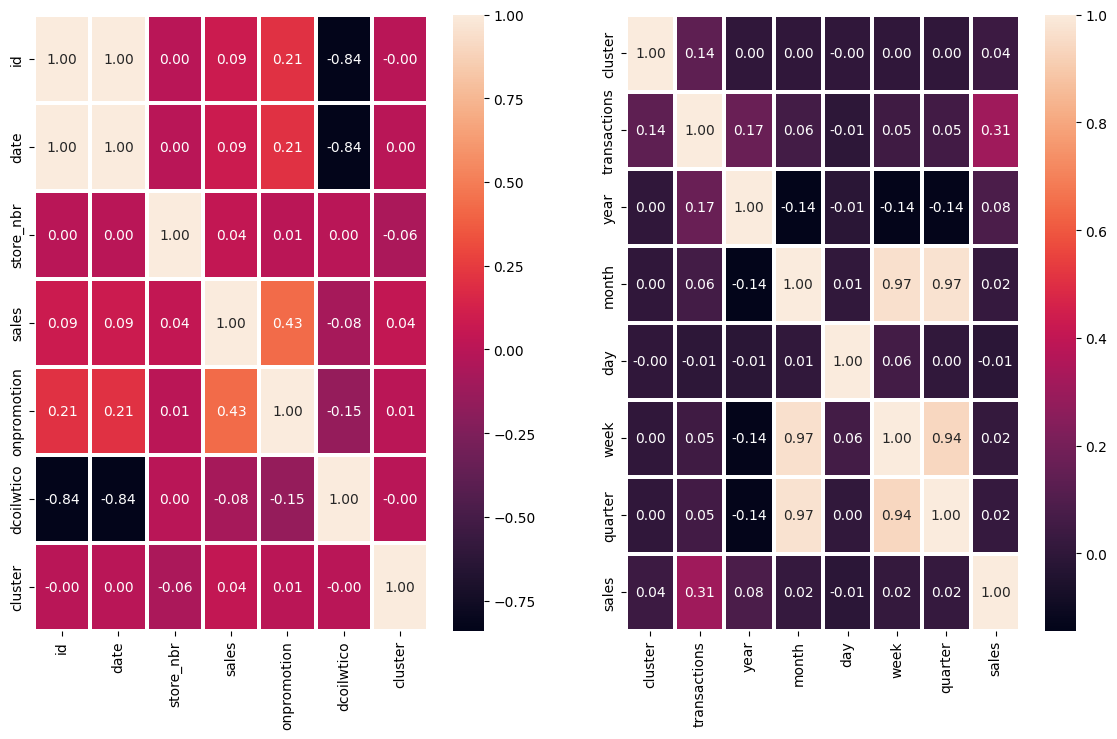

In [37]:
%matplotlib inline

# Create a copy of df_merged2 to work with, ensuring the original DataFrame remains unchanged
df_mergedDrop = df_merged2.copy()

# Fill missing values in the 'transactions' column with the column's mean value
df_mergedDrop.transactions = df_merged2.transactions.fillna(df_merged2.transactions.mean())

# Verify that no null values remain in 'Transactions"
df_nan3 = pd.DataFrame(df_mergedDrop.isna().sum()).reset_index().rename(columns={0: 'total_nan', 'index': 'coluna'})

# Create a DataFrame containing only numerical columns
df_mergedc1 = df_mergedDrop[qt]

# Initialize two empty DataFrames to split numerical columns into subsets
df_mergedc2 = pd.DataFrame()  # First subset of numerical columns
df_mergedc3 = pd.DataFrame()  # Second subset of numerical columns

# Initialize a counter
x = 0

# Split numerical columns into two separate DataFrames
for i in df_mergedc1:
    if x <= 6:  # First 7 columns go into df_mergedc2
        df_mergedc2[i] = df_mergedc1[i]
    if x > 5:  # Remaining columns go into df_mergedc3
        df_mergedc3[i] = df_mergedc1[i]
    x += 1

# Ensure that 'sales' is included in df_mergedc3
df_mergedc3['sales'] = df_mergedc1["sales"]

# Create a figure with two subplots (side by side) with a size of (14,8)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

# Generate heatmaps for correlation matrices of the two numerical subsets
sns.heatmap(df_mergedc2.corr(), annot=True, linewidths=1.5, fmt='.2f', ax=ax1)  # First subset
sns.heatmap(df_mergedc3.corr(), annot=True, linewidths=1.5, fmt='.2f', ax=ax2)  # Second subset

The same is observed by fillind the data with the mean of transactions, in such cenario both approches are acceptable (this cell if for academic purposes only as it will not make to the code final version)

### **Hollyday data set**:

<br>


The len of data is short, therefore the best vizualisation was to simply open it in a sheets application. In orther to understand its composition.

<br>
<br>


*  Workdays occuring in celabratory dates are pointed.
*  Holidays that the column Transfered = True did not occur.
*  Holiday,addicional,transfered and Brigde indicate off days in the type column
*  There are holidays that occur only certain regions or cities. And will therefore affect only stores pertaining to them.

<br>
<br>

The concept to fill values will be to present a boolean variable with 1 being a work day and 0 being an off day.

<br>
<br>

* All dates not matching any record on the holiday data frame can be filled with 1 since it is infered they represent workdays.
* All dates that match with a holiday and whose location match the holiday location can be filled with 0
*Each holiday description is unique and therefore the column can be dropped (since the potencial contribution is irrelevant)


In [38]:
#Creates a copy of the data frame to preserve the original

df_merged3=df_mergedDrop.copy()

#Fill null entries with 1 assuming the work day premise explained. Here i use the holiday_type column for simplicity
df_merged3.holiday_type = df_mergedDrop.holiday_type.fillna(1)

#If celebratory date is a workdate, fill replace with 1
df_merged3.holiday_type=df_merged3.holiday_type.replace(to_replace='Work Day', value=1)

#Verification no null values remain.
df_nan3 = pd.DataFrame(df_merged3.isna().sum()).reset_index().rename(columns = {0:'total_nan', 'index': 'coluna'})
print(df_nan3)


#Replace the other types entries with zero to indicate off days
df_merged3.holiday_type = df_merged3.holiday_type.replace(['Transfer', 'Bridge', 'Additional', 'Event','Holiday'], 0)


#If the off day was transfered we replace the 0 with 1 in holiday type

df_merged3.loc[df_merged3.transferred == 1, 'holiday_type'] = 1

          coluna  total_nan
0             id          0
1           date          0
2      store_nbr          0
3         family          0
4          sales          0
5    onpromotion          0
6   holiday_type          0
7         locale    2551824
8    locale_name    2551824
9    description    2551824
10   transferred    2551824
11    dcoilwtico     955152
12          city          0
13         state          0
14    store_type          0
15       cluster          0
16  transactions          0
17          year          0
18         month          0
19           day          0
20          week          0
21       quarter          0
22   day_of_week          0


<ipython-input-38-5c2c0d922119>:17: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



At this point, the are no missing values and all holidays and work days are correctly assigned as 1 and 0 respectvely. However there is still the issue about regional holidays to be addressed and corrected. (In the following the description column and transfered column are also dropped for lack of future use)

In [39]:
#Creating a copy of the data frame to preserve the original.

#Dropping the description column
df_merged4=df_merged3.copy()
df_merged4.drop("description",axis=1,inplace=True)

#Dropping column transferred
df_merged4.drop("transferred",axis=1,inplace=True)
df_merged4

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,dcoilwtico,...,state,store_type,cluster,transactions,year,month,day,week,quarter,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,0,National,Ecuador,NaN,...,Pichincha,D,13,0.0,2013,1,1,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.000,0,0,National,Ecuador,NaN,...,Pichincha,D,13,0.0,2013,1,1,1,1,Tuesday
2,2,2013-01-01,1,BEAUTY,0.000,0,0,National,Ecuador,NaN,...,Pichincha,D,13,0.0,2013,1,1,1,1,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.000,0,0,National,Ecuador,NaN,...,Pichincha,D,13,0.0,2013,1,1,1,1,Tuesday
4,4,2013-01-01,1,BOOKS,0.000,0,0,National,Ecuador,NaN,...,Pichincha,D,13,0.0,2013,1,1,1,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,0,Local,Riobamba,47.57,...,Pichincha,B,6,2155.0,2017,8,15,33,3,Tuesday
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,0,Local,Riobamba,47.57,...,Pichincha,B,6,2155.0,2017,8,15,33,3,Tuesday
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,0,Local,Riobamba,47.57,...,Pichincha,B,6,2155.0,2017,8,15,33,3,Tuesday
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,0,Local,Riobamba,47.57,...,Pichincha,B,6,2155.0,2017,8,15,33,3,Tuesday


In [40]:
#Create a sub data frame to compare locals from holiday dataframe (local_name) and sales data frame (city,state)

df_H = df_merged4[['holiday_type', 'locale', 'locale_name', 'state', 'city']]

# Apply the condition efficiently using vectorized operations
mask = (
    (df_H['holiday_type'] == 0) &
    (df_H['locale_name'] != df_H['city']) &
    (df_H['locale_name'] != df_H['state']) &
    (df_H['locale_name'] != 'Ecuador')
)

df_H.loc[mask, 'holiday_type'] = 1

Finaly to finish dealing with the null values that arrised from the merge of the holiday dataframe, with drop locale and local name columns since those have redundant information with city and state columns at this point

In [41]:
#Setting a copy of the dataframe to preserve the original

df_merged5=df_merged4.copy()

#Making the replacement with the city and locale matching performed above
df_merged5['holiday_type']=df_H['holiday_type']

#Droping the locale and locale_name columns
df_merged5.drop('locale',axis=1,inplace=True)
df_merged5.drop('locale_name',axis=1,inplace=True)

In [42]:
#Verifing the null remove operation results:

df_nan5 = pd.DataFrame(df_merged5.isna().sum()).reset_index().rename(columns = {0:'total_nan', 'index': 'column'})
df_nan5

,column,total_nan
0,id,0
1,date,0
2,store_nbr,0
3,family,0
4,sales,0
5,onpromotion,0
6,holiday_type,0
7,dcoilwtico,955152
8,city,0
9,state,0


### **Oil Data set**
<br>
<br>
Now to deal with the missing oil information. The next cell serves only to confirm the suspition that weekend's oil prices are NaN's since prices are not updated in such days. Since the cell is relatively slow to run, it is muted.

In [43]:
# Count null values in 'dcoilwtico' for each day of the week
nan_counts = df_merged5[df_merged5['dcoilwtico'].isna()]['day_of_week'].value_counts()

# Print only Saturday and Sunday counts
print(nan_counts.get('Saturday', 0), nan_counts.get('Sunday', 0))



436590 441936


 When can see than that 92% of null are then derived from this fact. I decided then to replace these values with the friday closing value such as would be the case in financial markets.
 <br>
 <br>
 As for the remaining values, although less precise for them, they will be delt the same fashion, being filled with the last value avaiable. This strategy makes for an apropriate aproximation of prices that is prompt to fail only in the case of sudden shifts in price that happen to occur on the day of a null value. From a second grafical source at [eia.gov](https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=pet&s=i25499000008&f=m) no such shifts were identified given me more endorsement to perform this strategy.

In [44]:
# The method ffill from pandas makes sunch propagation sequentialy
# Fill remaining NaN values with the last available value before them

df_merged5['dcoilwtico'].ffill(inplace=True)


<ipython-input-44-90d5c16e18ab>:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [45]:
#Verify if there are remaining nan

df_nan6 = pd.DataFrame(df_merged5.isna().sum()).reset_index().rename(columns = {0:'total_nan', 'index': 'column'})
df_nan6

,column,total_nan
0,id,0
1,date,0
2,store_nbr,0
3,family,0
4,sales,0
5,onpromotion,0
6,holiday_type,0
7,dcoilwtico,1782
8,city,0
9,state,0


In [46]:
df_merged5.shape

(3054348, 19)

We observe 1782 out of 3054348 rows remain as null (0.06 %), a  quick look on the  [Data First Look Session](#scrollTo=https://colab.research.google.com/drive/1Q_wGlKCL3UgXPCTX8TW0_snrlcxBAtO9#scrollTo=H7PraKH6dLMk) allows us to deduce it came from the fact that oil values of the very first day of the data frame 01/01/2013 is missing.
<br>
<br>
Since ffill requires the preceding value, the method didn't fill these values specificaly. With such low percentage one can easely drop the remaining NaN. However since the cause was identified and one can easely find the correct value of   [$95.08](https://https://www.ceicdata.com/en/ecuador/crude-oil-prices/crude-oil-price-average-oriente). It only seemed appropriate for an educational notebook to be thorough:

In [47]:
#Final Oil fill NaN adjustments

df_merged5.dcoilwtico=df_merged5.dcoilwtico.fillna(95.08)
df_nan6 = pd.DataFrame(df_merged5.isna().sum()).reset_index().rename(columns = {0:'total_nan', 'index': 'column'})
df_nan6

,column,total_nan
0,id,0
1,date,0
2,store_nbr,0
3,family,0
4,sales,0
5,onpromotion,0
6,holiday_type,0
7,dcoilwtico,0
8,city,0
9,state,0


Not always does data wrangling bears fruits, here with the correlation matrix bellow we can observe that the filling of missing oil price values did not improve the correlation as the holidays dataframe correction did. Even with ecuador being a country with an economy conected to oil prices.
<br>
<br>
Dropping them could be considered from this perspective. However doing so would have selectively dropped weekend values as we've determined. And weekend also happen to be the biggest selling days [Acording to our previous analysis.](https://https://colab.research.google.com/drive/1Q_wGlKCL3UgXPCTX8TW0_snrlcxBAtO9#scrollTo=AtId3w0lsvc3&line=3&uniqifier=1) so these operations allow us to preserve this value.

<Axes: >

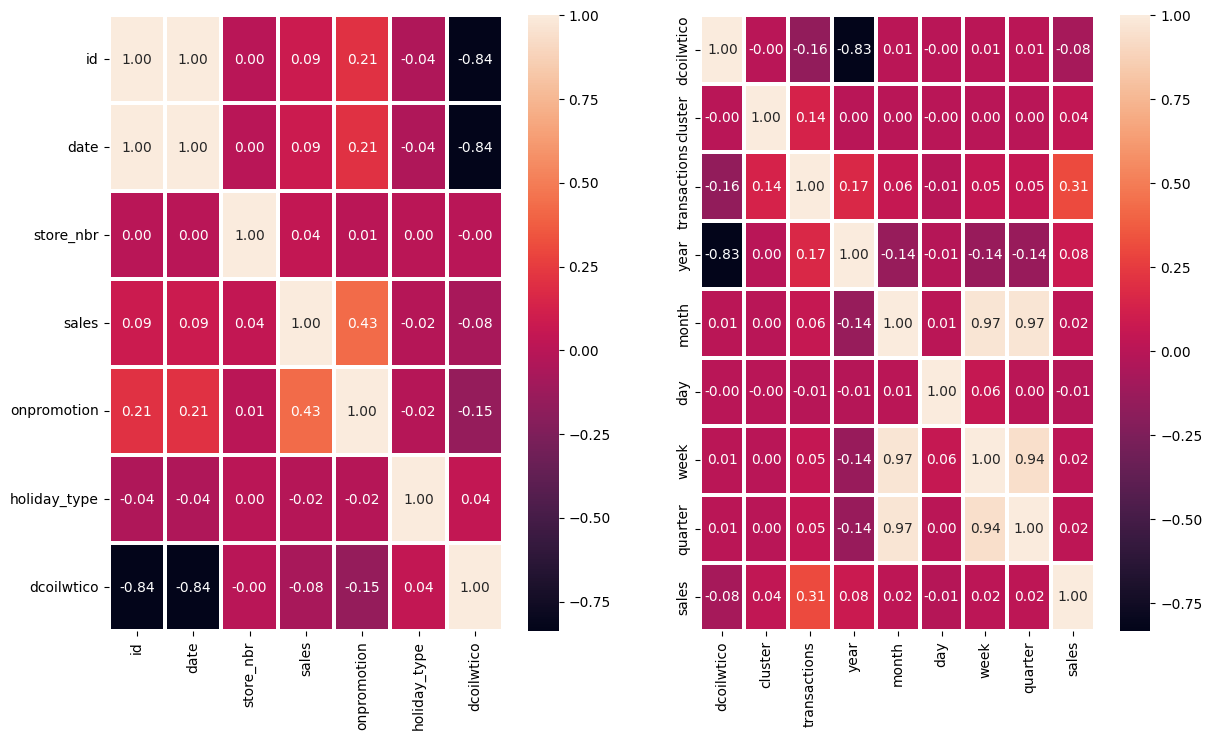

In [48]:
%matplotlib inline

df_nan6["sales"]=df_merged5['sales']
df_nan6["TransactionsN"]=df_merged5['transactions']



ql = []
qt = []

for i in df_merged5.dtypes.index:
    if df_merged5.dtypes[i] == 'object':
        ql.append(i)
    else:
        qt.append(i)

dfqt=df_merged5[qt]
dfql=df_merged5[ql]

df_mergedc1=df_merged5[qt]
df_mergedc2=pd.DataFrame()
df_mergedc3=pd.DataFrame()
x=0
for i in df_mergedc1 :
  if x<=6:
    df_mergedc2[i]=df_mergedc1[i]
  if x>5:
    df_mergedc3[i]=df_mergedc1[i]
  x+=1
df_mergedc3['sales']=df_mergedc1["sales"]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,8))

sns.heatmap(df_mergedc2.corr(), annot = True, linewidths=1.5 , fmt = '.2f',ax=ax1)
sns.heatmap(df_mergedc3.corr(), annot = True, linewidths=1.5 , fmt = '.2f',ax=ax2)

## Data Wrangling:Dealing with Duplicate Values

In [49]:
#Using Pandas Built in Function : we search for number of duplicates

duplicate_count = df_merged5.duplicated().sum()
print(f"Total duplicate rows before method's: {duplicate_count}")

#And dropping the duplicates also with pandas built in function:

df_merged6 = df_merged5.drop_duplicates()

#Verify the droping was correctly performed:

duplicate_count = df_merged6.duplicated().sum()
print(f"Total duplicate rows after method's: {duplicate_count}")

Total duplicate rows before method's: 36300
Total duplicate rows after method's: 0


## Data Wrangling : Dealing with Outliers

Now that all NaN's are filled and duplicates removed we may continue to our final data wrangling step by resolving the outliers in our numerical values. First as usual the boxplots are ploted to gain a first insight in the magnitude of these in our data.

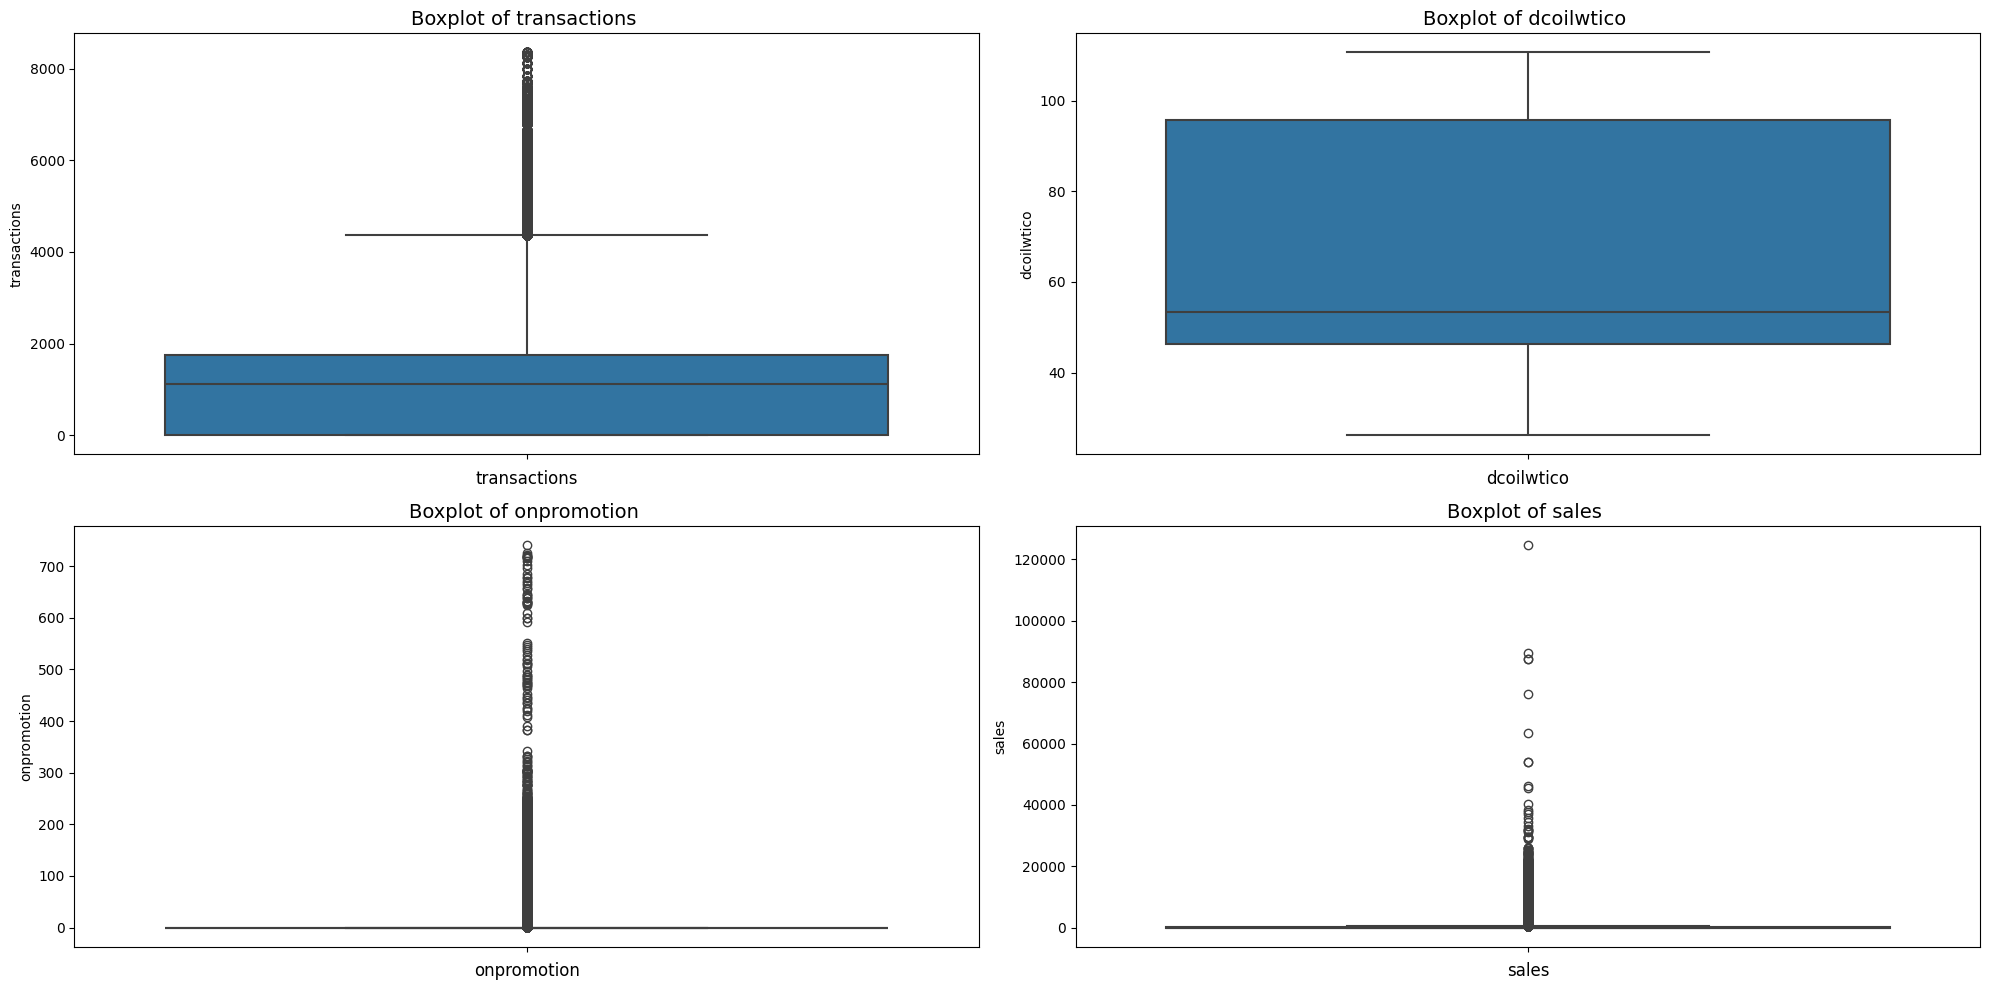

In [50]:
%matplotlib inline

# Define columns to plot

columns_to_plot = ['transactions', 'dcoilwtico', 'onpromotion', 'sales']

# Create box plots
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Loop through columns and plot
for ax, col in zip(axs.flatten(), columns_to_plot):
    ax.set_title(f'Boxplot of {col} ', fontsize=14)
    sns.boxplot(data=df_merged6[col], ax=ax, linewidth=1.5)
    ax.set_xlabel(col, fontsize=12)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


In this first look, we observe that ouer approach in dealing with the oil prices dataset did not produce outliers. Therefore no revision of this previous step is necessary.

The other columns however present prominent outliers. It is required to count these and compare to the total dataset size in order to estimate the magnitude of their impact.

In [51]:
# Define function to count outliers using the IQR method

def count_outliers(series):
    Q1 = series.quantile(0.25)  # First quartile (25%)
    Q3 = series.quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound
    return ((series < lower_bound) | (series > upper_bound)).sum()

# Columns to check

columns = ['transactions', 'dcoilwtico', 'onpromotion', 'sales']

# Count outliers for each column

outlier_counts = {col: count_outliers(df_merged6[col]) for col in columns}

# Display results
for col, count in outlier_counts.items():
    print(f"🔹 The total number of outliers in the column {col} is {count}.")

🔹 The total number of outliers in the column transactions is 54993.
🔹 The total number of outliers in the column dcoilwtico is 0.
🔹 The total number of outliers in the column onpromotion is 615584.
🔹 The total number of outliers in the column sales is 449468.


Compared to the total amount of data, the outliers in transactions are rather small, the same can not be stated for the promotions and sales column. The sales column is the target data column, and the promotion column as seen previously is the one with the highest correlation. To deal with them caution is requiered. A first hunch involves verifing if the sales outliers match promotion outliers (in the sense of especialy appeling promotion promoting especialy high sales as would be idealized):

In [52]:
# Function to identify outlier indices using IQR

def get_outlier_indices(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)].index

# Get outlier indices for both columns

promo_outliers = get_outlier_indices(df_merged6['onpromotion'])
sales_outliers = get_outlier_indices(df_merged6['sales'])

# Find matching outliers (rows where both are outliers)

matching_outliers = promo_outliers.intersection(sales_outliers)

# Display results

percentage=round((len(matching_outliers)/len(sales_outliers)*100),2)
print(f"🔹 Total outliers in 'onpromotion': {len(promo_outliers)}")
print(f"🔹 Total outliers in 'sales': {len(sales_outliers)}")
print(f"✅ Matching outliers (same row index): {len(matching_outliers)}")
print(f"🔹 Percentage of outliers of sales assumed hypoteticaly caused to be caused by promotiuons: {percentage} %")


🔹 Total outliers in 'onpromotion': 615584
🔹 Total outliers in 'sales': 449468
✅ Matching outliers (same row index): 271035
🔹 Percentage of outliers of sales assumed hypoteticaly caused to be caused by promotiuons: 60.3 %


The choice made was to based on this hypothesis, to leave this matching lines as it is assuming they will provide positive information for our model. Now to observe how the data behaves without this exceptions (plotting the box box from a dataframe excluding these matching lines)


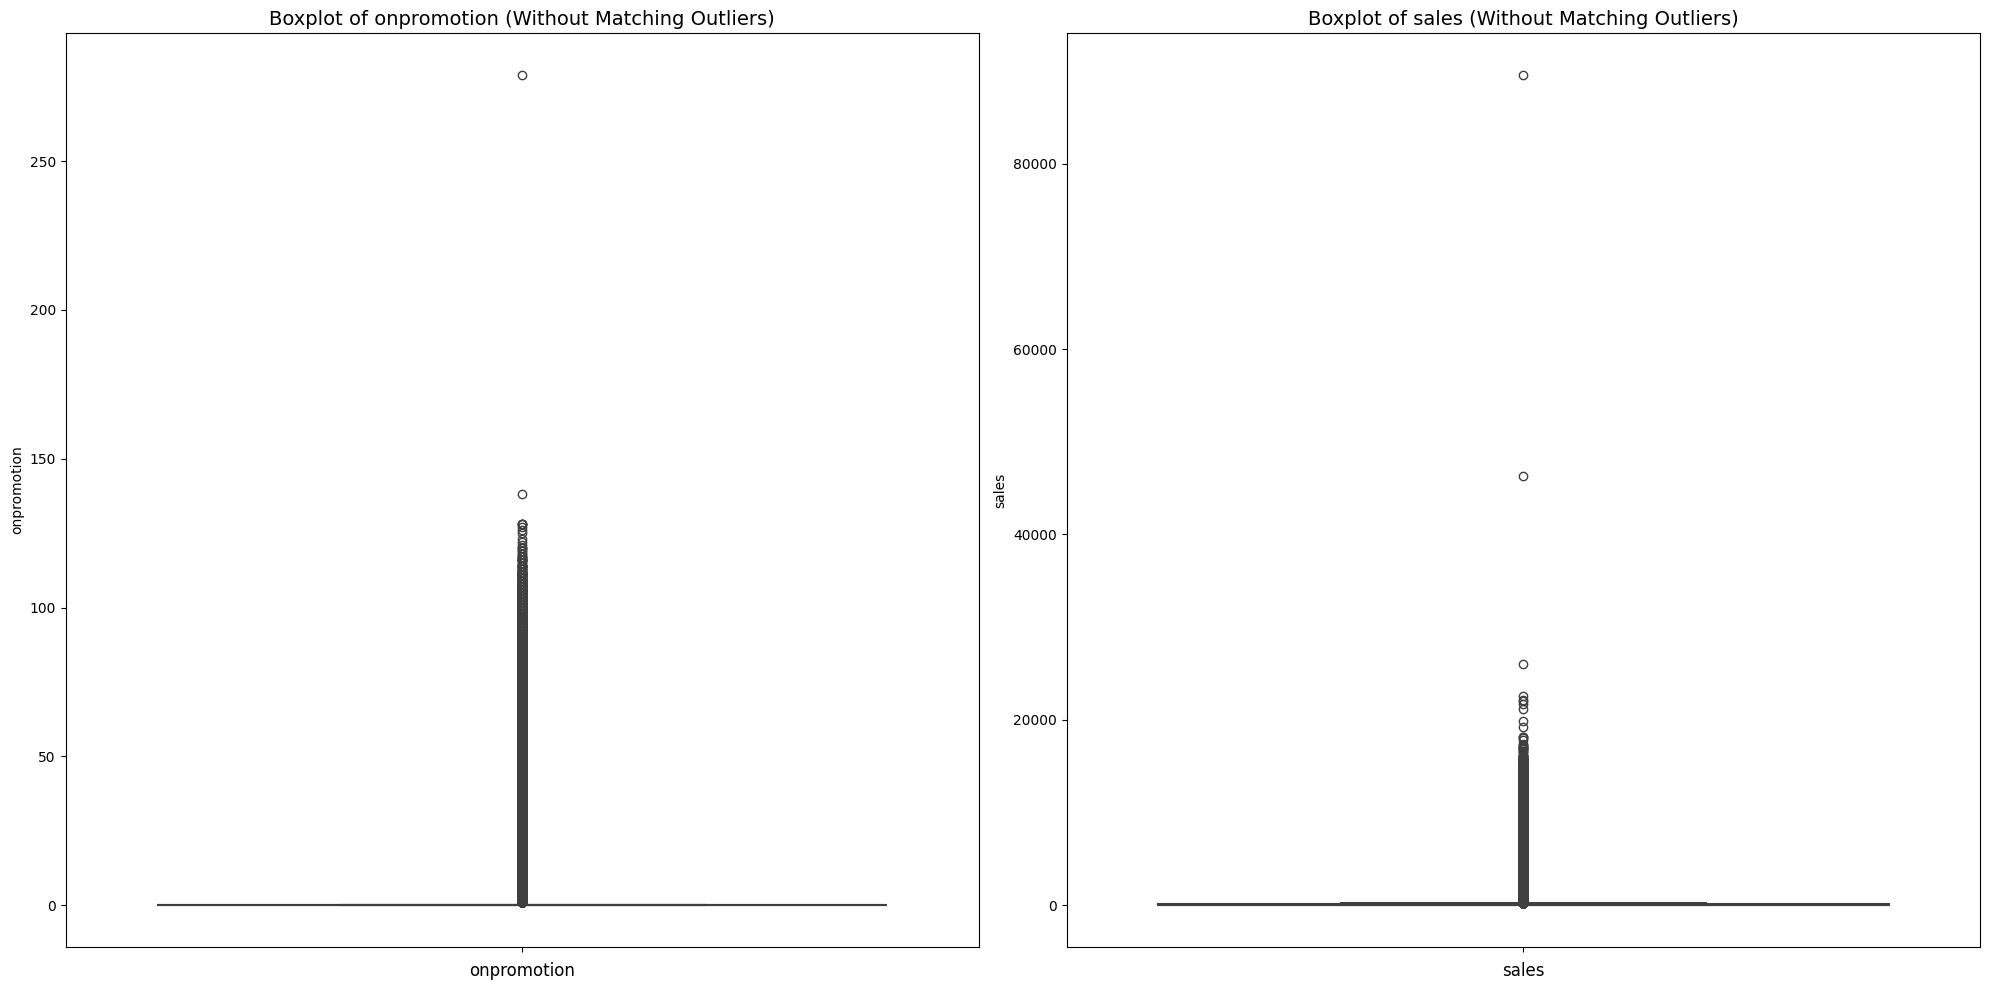

In [53]:
%matplotlib inline

# Exclude matching outlier indices
df_filtered = df_merged6.drop(index=matching_outliers)

# Define columns to plot
columns_to_plot = ['onpromotion', 'sales']

# Create box plots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Loop through columns and plot
for ax, col in zip(axs.flatten(), columns_to_plot):
    ax.set_title(f'Boxplot of {col} (Without Matching Outliers)', fontsize=14)
    sns.boxplot(data=df_filtered[col], ax=ax, linewidth=1.5)
    ax.set_xlabel(col, fontsize=12)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

This view show that the outliers caused by special promotions were also the ones with the most extreme values. The remaining one are on average much closer to the interquartile range compared to them.
<br>
<br>
The approach to deal with the outliers will be thefore as follows:

* As the transactions column will be dropped ( since the test set does not posses this information and therefore cannot make use of said columns) we can ignore the outliers contained in it.
* The outliers that match, ie large promotions resulting in large sales will be kept.
* The remaining outlier still account for over 200 thousand entries and will not be dropped. The Quantile Based Flooring and Capping method will be employed over the median method given that all outliers belong to high values side of data.  

In [54]:
# Define quantile limits
lower_quantile = 0.10
upper_quantile = 0.90

# Exclude matching outliers (special attention to not update index since it will be required to remerge the lines)
df_filtered = df_merged6.drop(index=matching_outliers).copy()

# Apply quantile-based flooring and capping
for col in ['onpromotion', 'sales']:
    q_low = df_filtered[col].quantile(lower_quantile)     #Finding limit values.
    q_high = df_filtered[col].quantile(upper_quantile)

    df_filtered[col] = np.where(df_filtered[col] < q_low, q_low, df_filtered[col]) #Conditioning element selection and replacemente
    df_filtered[col] = np.where(df_filtered[col] > q_high, q_high, df_filtered[col])

# Display summary of changes
print("✔️ Quantile-based outlier treatment applied!")
print(f"Values below {lower_quantile*100}% quantile replaced with the quantile value.")
print(f"Values above {upper_quantile*100}% quantile replaced with the quantile value.")

#Reunite the data and drop the transactions column as explained previously:

df_merged7=df_merged6.copy()
df_merged7.update(df_filtered)
df_merged7.drop("transactions",axis=1,inplace=True)
df_merged7.head()

✔️ Quantile-based outlier treatment applied!
Values below 10.0% quantile replaced with the quantile value.
Values above 90.0% quantile replaced with the quantile value.


<ipython-input-54-472061e74722>:24: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2013 2013 2013 ... 2017 2017 2017]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.

<ipython-input-54-472061e74722>:24: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 8 8 8]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.

<ipython-input-54-472061e74722>:24: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1  1  1 ... 15 15 15]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.

<ipython-input-54-472061e74722>:24: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 3 3 3]' has dtype incomp

,id,date,store_nbr,family,sales,onpromotion,holiday_type,dcoilwtico,city,state,store_type,cluster,year,month,day,week,quarter,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0,95.08,Quito,Pichincha,D,13,2013,1,1,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.0,0,0,95.08,Quito,Pichincha,D,13,2013,1,1,1,1,Tuesday
2,2,2013-01-01,1,BEAUTY,0.0,0,0,95.08,Quito,Pichincha,D,13,2013,1,1,1,1,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.0,0,0,95.08,Quito,Pichincha,D,13,2013,1,1,1,1,Tuesday
4,4,2013-01-01,1,BOOKS,0.0,0,0,95.08,Quito,Pichincha,D,13,2013,1,1,1,1,Tuesday


Now we can finaly move on into the model making steps starting with the encoding and resclaling of data.

Freeing Memory

In [55]:
# List of DataFrames to delete
df_remove_list = [df_nan,df_nan2,df_nan3,df_nan5,df_nan6,dfql,dfqt,df0,dfOil,dfHolidays,dfStores,df_filtered]

# Delete each DataFrame
for df in df_remove_list:
    del df

# Force garbage collection to free memory
gc.collect()

394

##Data Wrangling: Restricting the Data Set to Relevant Data

The first choice was to limit the time series analysis only in the month surrounding the period targeted to be predicted (16 august 2017 to 31 august 2017). This choice limits noise generated from unecessary data as well as cut out the influence of 2016 april earthquake that stroke Equador.

In [56]:
df_merged8 = df_merged7[df_merged7["month"].isin([7, 8, 9])]
df_merged8["month"].unique() # Should print only [7, 8, 9]


array([7, 8, 9])

Since the Data Column has had already all it's information extracted on other column, it can be droped as well.

In [57]:
#Droping Date colum as it's information has been extracted in other columns

df_merged8=df_merged8.drop('date',axis=1)

# DATA PRE MODEL PROCESSING

## Data pre model processing: Encoding Data

### Encoding with Label encoder vs pd.get_dummies

Since this code is made for learning purposes, both LabelEnconder from sklearn and pd_getdummies will are accessible, however since there are variables that are not ordinal in our data set, get_dummies will be the chosen method for the posterior processing.
<br>
<br>
I should be noted that this choice will cause the dataframe to become much slower to train. However given the challenge being centered around accuracy rather than efficiency the choice was still made.
<br>
<br>
An addicional binary column is created here. In the challenge, perishable products are given more weight in the scoring process given that stocking them unnecessarely results in cost for the company. This new column will be used to address that, classifing as 1 perishables and 0 non perishables. From the data analysis performed earlier we extract 12 out of 33 categories as perishables:

* GROCERY 1
*BEVERAGES
*PRODUCE
* DAIRY
* BREAD/BAKERY
*POULTRY
*MEATS
*DELI
* EGGS
*PREPARED FOODS
*SEAFOOD
*GROCERY II

In [58]:
#Turning categorical variables labelled as numerical into strings ( stores number and clusters are classifications not ordered)
df_merged8.cluster=df_merged8.cluster.astype(str)
df_merged8.store_nbr=df_merged8.store_nbr.astype(str)
df_merged8.holiday_type=df_merged8.holiday_type.astype(str)

# Define the list of target categories
food_categories = [
    "GROCERY I", "BEVERAGES", "PRODUCE", "DAIRY", "BREAD/BAKERY",
    "POULTRY", "MEATS", "DELI", "EGGS", "PREPARED FOODS", "SEAFOOD", "GROCERY II"
    ]

# Create the new column with 1 if the family is in the list, else 0
df_merged8["is_perishable"] = df_merged8["family"].isin(food_categories).astype(bool)

#Verifing operation
print(df_merged8.dtypes)
df_merged8.head(10)

id                 int64
store_nbr         object
family            object
sales            float64
onpromotion        int64
holiday_type      object
dcoilwtico       float64
city              object
state             object
store_type        object
cluster           object
year               int64
month              int64
day                int64
week              UInt32
quarter            int64
day_of_week       object
is_perishable       bool
dtype: object


,id,store_nbr,family,sales,onpromotion,holiday_type,dcoilwtico,city,state,store_type,cluster,year,month,day,week,quarter,day_of_week,is_perishable
327888,322542,1,AUTOMOTIVE,0.000,0,1,97.94,Quito,Pichincha,D,13,2013,7,1,27,3,Monday,False
327889,322543,1,BABY CARE,0.000,0,1,97.94,Quito,Pichincha,D,13,2013,7,1,27,3,Monday,False
327890,322544,1,BEAUTY,4.000,0,1,97.94,Quito,Pichincha,D,13,2013,7,1,27,3,Monday,False
327891,322545,1,BEVERAGES,355.000,0,1,97.94,Quito,Pichincha,D,13,2013,7,1,27,3,Monday,True
327892,322546,1,BOOKS,0.000,0,1,97.94,Quito,Pichincha,D,13,2013,7,1,27,3,Monday,False
327893,322547,1,BREAD/BAKERY,351.972,0,1,97.94,Quito,Pichincha,D,13,2013,7,1,27,3,Monday,True
327894,322548,1,CELEBRATION,0.000,0,1,97.94,Quito,Pichincha,D,13,2013,7,1,27,3,Monday,False
327895,322549,1,CLEANING,355.000,0,1,97.94,Quito,Pichincha,D,13,2013,7,1,27,3,Monday,False
327896,322550,1,DAIRY,355.000,0,1,97.94,Quito,Pichincha,D,13,2013,7,1,27,3,Monday,True
327897,322551,1,DELI,132.507,0,1,97.94,Quito,Pichincha,D,13,2013,7,1,27,3,Monday,True


Now proceding with the encoding. As mentioned, get_dummies will be the choice but Label Encoder is still avaiable if needed.

In [59]:
# Display menu
print("-----------------------------")
print("Select Categorical Variable Encoding Method")
print("------------------------------")
print("Type 1 for Label Encoding")
print("Type 2 for One-Hot Encoding")

# Validate input
while True:
    Label = input("Method: ")
    if Label in ['1', '2']:
        break
    print("Invalid entry. Please type 1 or 2.")

# Apply Label Encoding if selected
if Label == '1':
    le = LabelEncoder()

    # Select categorical columns
    categorical_cols = df_merged8.select_dtypes(include=['object']).columns.tolist()

    # Apply LabelEncoder to each column
    for col in categorical_cols:
        df_merged8[col + '_encoded'] = le.fit_transform(df_merged8[col])

    # Drop original categorical columns
    df_merged8.drop(columns=categorical_cols, inplace=True)

# Apply One-Hot Encoding if selected
elif Label == '2':
    df_merged8 = pd.get_dummies(df_merged8, drop_first=True)
    df_merged8= df_merged8.drop(columns='id')
# Display first 5 rows of the modified dataframe
df_merged8.head()

-----------------------------
Select Categorical Variable Encoding Method
------------------------------
Type 1 for Label Encoding
Type 2 for One-Hot Encoding
Method: 2


,sales,onpromotion,dcoilwtico,year,month,day,week,quarter,is_perishable,store_nbr_10,...,cluster_6,cluster_7,cluster_8,cluster_9,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
327888,0.0,0,97.94,2013,7,1,27,3,False,False,...,False,False,False,False,True,False,False,False,False,False
327889,0.0,0,97.94,2013,7,1,27,3,False,False,...,False,False,False,False,True,False,False,False,False,False
327890,4.0,0,97.94,2013,7,1,27,3,False,False,...,False,False,False,False,True,False,False,False,False,False
327891,355.0,0,97.94,2013,7,1,27,3,True,False,...,False,False,False,False,True,False,False,False,False,False
327892,0.0,0,97.94,2013,7,1,27,3,False,False,...,False,False,False,False,True,False,False,False,False,False


As predicted, our data set grew considerably. With 157 columns after the encoding process.

## Data pre-model processing: Rescalling Data

We procede with the rescalling of data to avoid bias in our model. The id column serves only as an index and can therefore be dropped given the index is already correctly assigned. The sales Id is excluded from the rescalling as it is our target variable.

In [60]:
# Create a copy of df_merged8 to preserve original and a copy of sales column

df_scaled = df_merged8.copy()
df_target = df_merged8.sales

# Delete the DataFrames not used anymore to free memory usage

#for i in range(1, 9):
 #   var_name = f"df_merged{i}"
  #  if var_name in globals():
   #     del globals()[var_name]

# Force garbage collection to free memory the df was copied to alter its name

gc.collect()

# Define the columns to scale (excluding target column 'sales')
df_scaled = df_scaled.drop(columns=['sales'])
features_to_scale = df_scaled.select_dtypes(include=['number']).columns

# Initialize the StandardScaler

scaler = StandardScaler()

# Apply scaling only to the selected features
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])

# Display the first few rows

df_scaled.head(5)


,onpromotion,dcoilwtico,year,month,day,week,quarter,is_perishable,store_nbr_10,store_nbr_11,...,cluster_6,cluster_7,cluster_8,cluster_9,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
327888,-0.184318,0.961245,-1.352286,-1.128185,-1.641848,-1.482761,0.0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
327889,-0.184318,0.961245,-1.352286,-1.128185,-1.641848,-1.482761,0.0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
327890,-0.184318,0.961245,-1.352286,-1.128185,-1.641848,-1.482761,0.0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
327891,-0.184318,0.961245,-1.352286,-1.128185,-1.641848,-1.482761,0.0,True,False,False,...,False,False,False,False,True,False,False,False,False,False
327892,-0.184318,0.961245,-1.352286,-1.128185,-1.641848,-1.482761,0.0,False,False,False,...,False,False,False,False,True,False,False,False,False,False


## Data pre-model processing: Spliting Training and Testing Sets

#### Creating 0.8/0.2 Splits

In [58]:
# Split into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df_target, test_size=0.2, random_state=21)

# Display shapes to confirm
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (2414438, 156)
Testing Features Shape: (603610, 156)
Training Target Shape: (2414438,)
Testing Target Shape: (603610,)


In [ ]:
# Define save path
save_path = "/content/drive/My Drive/PROGRAMAS/PYDATASCI/Store Sales/"

# Save as Pickle files to preserve Data Types
X_train.to_pickle(f"{save_path}X_train.pkl")
X_test.to_pickle(f"{save_path}X_test.pkl")
y_train.to_pickle(f"{save_path}Y_train.pkl")
y_test.to_pickle(f"{save_path}Y_test.pkl")

print("Files saved successfully!")

#### Creating 0.7/0.3 Splits

In [61]:
# Split into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df_target, test_size=0.3, random_state=21)

# Display shapes to confirm
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (516885, 156)
Testing Features Shape: (221523, 156)
Training Target Shape: (516885,)
Testing Target Shape: (221523,)


In [62]:
# Define save path
save_path = "/content/drive/My Drive/PROGRAMAS/PYDATASCI/Store Sales/"

# Save as Pickle files to preserve Data Types
X_train.to_pickle(f"{save_path}X_train.pkl")
X_test.to_pickle(f"{save_path}X_test.pkl")
y_train.to_pickle(f"{save_path}Y_train.pkl")
y_test.to_pickle(f"{save_path}Y_test.pkl")

print("Files saved successfully!")

Files saved successfully!


Now our Data is ready to find the perfect model

# MODEL CREATION

## Model Creation: Choosing Model

Given the fact that our target variable is continuous, we consider implementing regressions. In parallel, a random forest as well as boosting models will be explored as to try to make to most use of our features and the fact that although continuos, our target is discrete.

 Later we will compare the Performance of Each in order to choose the Apropriate Model for our Question





**DISCLAIMER: As predicted the size of the training data along with colab's limitations brings session crashes that are afecting the notebook, the memory efficiency steps employed are not beeing sufficient due to colab's tendency to store wide ranges of data in the RAM, to go arround this issue, the Datasets will be exported, the session restarded and reloaded before each model training to ensure capabilities to run it with GridSearch**

### Tree Based Models.

Testing Tree Based Models: XGBoost,GradientBoostingRegressor, LightGradientBoosting, Randomn Forest to determine the better option among does.
<br>
<br>
For tree based models, the adicional importance of perishable products will be processed through Assigning Feature Weights of the column.

#### XGBoost

Killing the Session:

In [ ]:
#Restarting Session

import os

os._exit(00)

Reimporting Necessary Libraries

In [1]:
from google.colab import drive                          #Mounting Drive Into Notebook for use

import pandas as pd                                     #Main Data Frame Handling Library
import numpy as np                                      #Multi AArray processiong library

import calendar                                         #Library to suport time series analysis

from sklearn.model_selection import GridSearchCV  #Model Tuning training split and Grid Search

from sklearn.model_selection import train_test_split      #Goind to be used to make subset to speed up tests

!pip install xgboost                                    #Regressor Models Outside Sklearn Considered in the Search for Best Model
!pip install lightgbm
import xgboost as xgb
import lightgbm as lgb

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor      #Regressor Models Inside Sklearn Considered in the Search for Best Model
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge       #Regression Models

from sklearn.metrics import  make_scorer                #Model Evaluation Metrics Used

import gc                                               # Import garbage collector to free memory as needed

import time                                             #Training Time Visualization to evaluated model training performance


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Remounting Drive

In [2]:
drive.mount('/content/drive')           #Mounting Drive
!pwd
%cd /content/drive/My\ Drive/PROGRAMAS

#Establishing Path to the Correct Folder
# == %cd /content/drive/My\ Drive/"Folder Containing Raw Data"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
/content/drive/My Drive/PROGRAMAS


Reloading Data Exported Previously

In [3]:
# Define file path
load_path = "/content/drive/My Drive/PROGRAMAS/PYDATASCI/Store Sales/"

# Load pickle files
X_train = pd.read_pickle(f"{load_path}X_train.pkl")
X_test = pd.read_pickle(f"{load_path}X_test.pkl")
y_train = pd.read_pickle(f"{load_path}Y_train.pkl")
y_test = pd.read_pickle(f"{load_path}Y_test.pkl")

print("Data reloaded successfully!")

Data reloaded successfully!


Defining Custom Evaluation Metric for Grid Search:

As a way to consider the perishable factor as mentioned above, the choice for metric will be:
<br>
<br>

$$ NWRMSLE = \sqrt{ \frac{\sum{i=1}^n wi \left( \ln(\hat{y}i + 1) - \ln(yi +1)  \right)^2  }{\sum{i=1}^n wi}} $$

<br>
<br>

where for row i, \(\hat{y}i\) is the predicted unitsales of an item and \(yi\) is the actual unitsales; n is the total number of rows in the test set.

Perishable items are given a weight of 1.25

Just as the official metric for the chalenge, This metric is suitable when predicting values across a large range of orders of magnitudes. It avoids penalizing large differences in prediction when both the predicted and the true number are large.

Both metrics will be handled in this work, this choice difering from the official chalenge choice serves the learning purposes of this notebook.

In [4]:

# Function to compute Normalized Weighted Root Mean Squared Logarithmic Error (NWRMSLE)
def nwrmsle(y_true, y_pred, weights):

    y_pred = np.nan_to_num(y_pred, nan=0)  # Replace NaNs with 0
    y_pred = np.maximum(y_pred, 0)  # Ensure no negatives

    log_true = np.log1p(y_true)
    log_pred = np.log1p(y_pred)
    squared_log_error = (log_true - log_pred) ** 2
    weighted_error = weights * squared_log_error  # Apply weights
    return np.sqrt(np.sum(weighted_error) / np.sum(weights))

# Custom scorer function (without make_scorer)
def nwrmsle_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    weights = np.where(X.iloc[:, 9] == 1, 1.25, 1)  # Extract weights from X
    return -nwrmsle(y, y_pred, weights)  # Convert to negative for GridSearchCV


In [8]:
# -------------------------------
# 1️⃣ XGBoost with Memory Optimization Bin Test
# -------------------------------

# Convert training data to float32 to reduce memory usage
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)

# **1. Stratified Sampling for Regression**
# Create bins for stratification based on y_train distribution
y_bins = pd.qcut(y_train, q=10, duplicates="drop")  # Creates 10 quantile-based bins

# Sample only 30% of data while maintaining y distribution
X_sub, _, y_sub, _ = train_test_split(X_train, y_train, test_size=0.7, stratify=y_bins, random_state=42)


# Define XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=21)

# Hyperparameter grid
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Train model with GridSearchCV
start_time = time.time()
grid_xgb = GridSearchCV(xgb_model, param_grid_xgb, scoring=nwrmsle_scorer, cv=3, n_jobs=1)
grid_xgb.fit(X_sub, y_sub)
elapsed_time_xgb = time.time() - start_time

# Print results
print("------------------------------")
print("XGBoost Best Parameters:", grid_xgb.best_params_)
print("XGBoost Best NWRMSLE Score:", -grid_xgb.best_score_)
print(f"XGBoost Training Time: {elapsed_time_xgb:.2f} seconds")
print("------------------------------")

------------------------------
XGBoost Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
XGBoost Best NWRMSLE Score: 1.2621548812445438
XGBoost Training Time: 1694.42 seconds
------------------------------


#### LightGBM

From Light GBM and Forward the setup steps will be established without redoing the full explaination. See "XGBoost" Section for clarification if needed

In [ ]:
#Restarting Session

import os

os._exit(00)

In [5]:
from google.colab import drive                          #Mounting Drive Into Notebook for use

import pandas as pd                                     #Main Data Frame Handling Library
import numpy as np                                      #Multi AArray processiong library

import calendar                                         #Library to suport time series analysis

from sklearn.model_selection import GridSearchCV  #Model Tuning training split and Grid Search

!pip install xgboost                                    #Regressor Models Outside Sklearn Considered in the Search for Best Model
!pip install lightgbm
import xgboost as xgb
import lightgbm as lgb

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor      #Regressor Models Inside Sklearn Considered in the Search for Best Model
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge       #Regression Models

from sklearn.model_selection import train_test_split      #Goind to be used to make subset to speed up tests

from sklearn.metrics import  make_scorer                #Model Evaluation Metrics Used

import gc                                               # Import garbage collector to free memory as needed

import time                                             #Training Time Visualization to evaluated model training performance


drive.mount('/content/drive')           #Mounting Drive
!pwd
%cd /content/drive/My\ Drive/PROGRAMAS

#Establishing Path to the Correct Folder
# == %cd /content/drive/My\ Drive/"Folder Containing Raw Data"

# Define file path
load_path = "/content/drive/My Drive/PROGRAMAS/PYDATASCI/Store Sales/"

# Load pickle files
X_train = pd.read_pickle(f"{load_path}X_train.pkl")
X_test = pd.read_pickle(f"{load_path}X_test.pkl")
y_train = pd.read_pickle(f"{load_path}Y_train.pkl")
y_test = pd.read_pickle(f"{load_path}Y_test.pkl")

print("Data reloaded successfully!")


# Function to compute Normalized Weighted Root Mean Squared Logarithmic Error (NWRMSLE)
def nwrmsle(y_true, y_pred, weights):

    y_pred = np.nan_to_num(y_pred, nan=0)  # Replace NaNs with 0
    y_pred = np.maximum(y_pred, 0)  # Ensure no negatives

    log_true = np.log1p(y_true)
    log_pred = np.log1p(y_pred)
    squared_log_error = (log_true - log_pred) ** 2
    weighted_error = weights * squared_log_error  # Apply weights
    return np.sqrt(np.sum(weighted_error) / np.sum(weights))

# Custom scorer function (without make_scorer)
def nwrmsle_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    weights = np.where(X.iloc[:, 9] == 1, 1.25, 1)  # Extract weights from X
    return -nwrmsle(y, y_pred, weights)  # Convert to negative for GridSearchCV

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/PROGRAMAS
/content/drive/My Drive/PROGRAMAS
Data reloaded successfully!


In [6]:
# -------------------------------
# 2️⃣ LightGBM
# -------------------------------
lgb_model = lgb.LGBMRegressor(random_state=21)

# Hyperparameter grid
param_grid_lgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# **1. Stratified Sampling for Regression**
# Create bins for stratification based on y_train distribution
y_bins = pd.qcut(y_train, q=10, duplicates="drop")  # Creates 10 quantile-based bins

# Sample only 30% of data while maintaining y distribution
X_sub, _, y_sub, _ = train_test_split(X_train, y_train, test_size=0.7, stratify=y_bins, random_state=42)
y_sub = y_sub.values.ravel()                                                                            #Ensures de shape of y_sub to be 1-D as requiered
X_sub.columns = X_sub.columns.str.replace(r'[^A-Za-z0-9_]', '', regex=True)                             #Replaces forbiden caracters in LGBM for column titles


start_time = time.time()
grid_lgb = GridSearchCV(lgb_model, param_grid_lgb, scoring= nwrmsle_scorer, cv=3, n_jobs=-1, error_score='raise')
grid_lgb.fit(X_sub, y_sub)
elapsed_time_lgb = time.time() - start_time

print("------------------------------")
print("LightGBM Best Parameters:", grid_lgb.best_params_)
print("LightGBM Best NWRMSLE Score:", -grid_lgb.best_score_)
print(f"LightGBM Training Time: {elapsed_time_lgb:.2f} seconds")
print("------------------------------")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 872
[LightGBM] [Info] Number of data points in the train set: 724331, number of used features: 156
[LightGBM] [Info] Start training from score 283.094511
------------------------------
LightGBM Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
LightGBM Best NWRMSLE Score: 1.4712568444250937
LightGBM Training Time: 631.87 seconds
------------------------------


#### Gradient Boosting Regressor

In [ ]:
#Restarting Session

import os

os._exit(00)

In [1]:
from google.colab import drive                          #Mounting Drive Into Notebook for use

import pandas as pd                                     #Main Data Frame Handling Library
import numpy as np                                      #Multi AArray processiong library

import calendar                                         #Library to suport time series analysis

from sklearn.model_selection import GridSearchCV  #Model Tuning training split and Grid Search

!pip install xgboost                                    #Regressor Models Outside Sklearn Considered in the Search for Best Model
!pip install lightgbm
import xgboost as xgb
import lightgbm as lgb

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor      #Regressor Models Inside Sklearn Considered in the Search for Best Model
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge       #Regression Models

from sklearn.model_selection import train_test_split      #Goind to be used to make subset to speed up tests

from sklearn.metrics import  make_scorer                #Model Evaluation Metrics Used

import gc                                               # Import garbage collector to free memory as needed

import time                                             #Training Time Visualization to evaluated model training performance


drive.mount('/content/drive')           #Mounting Drive
!pwd
%cd /content/drive/My\ Drive/PROGRAMAS

#Establishing Path to the Correct Folder
# == %cd /content/drive/My\ Drive/"Folder Containing Raw Data"

# Define file path
load_path = "/content/drive/My Drive/PROGRAMAS/PYDATASCI/Store Sales/"

# Load pickle files
X_train = pd.read_pickle(f"{load_path}X_train.pkl")
X_test = pd.read_pickle(f"{load_path}X_test.pkl")
y_train = pd.read_pickle(f"{load_path}Y_train.pkl")
y_test = pd.read_pickle(f"{load_path}Y_test.pkl")

print("Data reloaded successfully!")


# Function to compute Normalized Weighted Root Mean Squared Logarithmic Error (NWRMSLE)
def nwrmsle(y_true, y_pred, weights):

    y_pred = np.nan_to_num(y_pred, nan=0)  # Replace NaNs with 0
    y_pred = np.maximum(y_pred, 0)  # Ensure no negatives

    log_true = np.log1p(y_true)
    log_pred = np.log1p(y_pred)
    squared_log_error = (log_true - log_pred) ** 2
    weighted_error = weights * squared_log_error  # Apply weights
    return np.sqrt(np.sum(weighted_error) / np.sum(weights))

# Custom scorer function (without make_scorer)
def nwrmsle_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    weights = np.where(X.iloc[:, 9] == 1, 1.25, 1)  # Extract weights from X
    return -nwrmsle(y, y_pred, weights)  # Convert to negative for GridSearchCV

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
/content/drive/My Drive/PROGRAMAS
Data reloaded successfully!


In [2]:
# -------------------------------
# 3️⃣ Gradient Boosting Regressor
# -------------------------------
gbr_model = GradientBoostingRegressor(random_state=21)

param_grid_gbr = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# **1. Stratified Sampling for Regression**
# Create bins for stratification based on y_train distribution
y_bins = pd.qcut(y_train, q=10, duplicates="drop")  # Creates 10 quantile-based bins

# Sample only 30% of data while maintaining y distribution
X_sub, _, y_sub, _ = train_test_split(X_train, y_train, test_size=0.9, stratify=y_bins, random_state=42)   #used 0.9 because 0.7 exceeded 6h

start_time = time.time()
grid_gbr = GridSearchCV(gbr_model, param_grid_gbr, scoring=nwrmsle_scorer, cv=2, n_jobs=-1)   # Less Folds due to higher training time
grid_gbr.fit(X_sub, y_sub)
elapsed_time_gbr = time.time() - start_time

print("------------------------------")
print("Gradient Boosting Regressor Best Parameters:", grid_gbr.best_params_)
print("Gradient Boosting Regressor Best NWRMSLE Score:", -grid_gbr.best_score_)
print(f"Gradient Boosting Training Time: {elapsed_time_gbr:.2f} seconds")
print("------------------------------")


------------------------------
Gradient Boosting Regressor Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Gradient Boosting Regressor Best NWRMSLE Score: 1.2666637330080248
Gradient Boosting Training Time: 5119.09 seconds
------------------------------


#### Random Forest

In [ ]:
#Restarting Session

import os

os._exit(00)

In [2]:
from google.colab import drive                          #Mounting Drive Into Notebook for use

import pandas as pd                                     #Main Data Frame Handling Library
import numpy as np                                      #Multi AArray processiong library

import calendar                                         #Library to suport time series analysis

from sklearn.model_selection import GridSearchCV  #Model Tuning training split and Grid Search

!pip install xgboost                                    #Regressor Models Outside Sklearn Considered in the Search for Best Model
!pip install lightgbm
import xgboost as xgb
import lightgbm as lgb

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor      #Regressor Models Inside Sklearn Considered in the Search for Best Model
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge       #Regression Models

from sklearn.model_selection import train_test_split      #Goind to be used to make subset to speed up tests

from sklearn.metrics import  make_scorer                #Model Evaluation Metrics Used

import gc                                               # Import garbage collector to free memory as needed

import time                                             #Training Time Visualization to evaluated model training performance


drive.mount('/content/drive')           #Mounting Drive
!pwd
%cd /content/drive/My\ Drive/PROGRAMAS

#Establishing Path to the Correct Folder
# == %cd /content/drive/My\ Drive/"Folder Containing Raw Data"

# Define file path
load_path = "/content/drive/My Drive/PROGRAMAS/PYDATASCI/Store Sales/"

# Load pickle files
X_train = pd.read_pickle(f"{load_path}X_train.pkl")
X_test = pd.read_pickle(f"{load_path}X_test.pkl")
y_train = pd.read_pickle(f"{load_path}Y_train.pkl")
y_test = pd.read_pickle(f"{load_path}Y_test.pkl")

print("Data reloaded successfully!")


# Function to compute Normalized Weighted Root Mean Squared Logarithmic Error (NWRMSLE)
def nwrmsle(y_true, y_pred, weights):

    y_pred = np.nan_to_num(y_pred, nan=0)  # Replace NaNs with 0
    y_pred = np.maximum(y_pred, 0)  # Ensure no negatives

    log_true = np.log1p(y_true)
    log_pred = np.log1p(y_pred)
    squared_log_error = (log_true - log_pred) ** 2
    weighted_error = weights * squared_log_error  # Apply weights
    return np.sqrt(np.sum(weighted_error) / np.sum(weights))

# Custom scorer function (without make_scorer)
def nwrmsle_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    weights = np.where(X.iloc[:, 9] == 1, 1.25, 1)  # Extract weights from X
    return -nwrmsle(y, y_pred, weights)  # Convert to negative for GridSearchCV

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Mounted at /content/drive
/content
/content/drive/My Drive/PROGRAMAS
Data reloaded successfully!


In [3]:
# -------------------------------
# 4️⃣ Random Forest
# -------------------------------
rf_model = RandomForestRegressor(random_state=21)

param_grid_rf = {
    'n_estimators': [50, 75],
    'max_depth': [10, 15]
}
# **1. Stratified Sampling for Regression**
# Create bins for stratification based on y_train distribution
y_bins = pd.qcut(y_train, q=10, duplicates="drop")  # Creates 10 quantile-based bins

# Sample only 30% of data while maintaining y distribution
X_sub, _, y_sub, _ = train_test_split(X_train, y_train, test_size=0.7, stratify=y_bins, random_state=21)

start_time = time.time()
grid_rf = GridSearchCV(rf_model, param_grid_rf, scoring=nwrmsle_scorer, cv=2, n_jobs=-1)
grid_rf.fit(X_sub, y_sub)
elapsed_time_rf = time.time() - start_time

print("------------------------------")
print("Random Forest Best Parameters:", grid_rf.best_params_)
print("Random Forest Best NWRMSLE Score:", -grid_rf.best_score_)
print(f"Random Forest Training Time: {elapsed_time_rf:.2f} seconds")
print("------------------------------")

------------------------------
Random Forest Best Parameters: {'max_depth': 15, 'n_estimators': 50}
Random Forest Best NWRMSLE Score: 1.0319071707334948
Random Forest Training Time: 2933.58 seconds
------------------------------


### Regression Models

Regression Based Models: Linear Regression, Ridge Regression,  to determine the better option among does.
<br>
<br>
For regression based models, the adicional importance of perishable products will be processed through Feature Scalling of the column.

#### Linear Regression

In [ ]:
#Restarting Session to ensure memory despite running previous models.

import os

os._exit(00)

In [1]:
from google.colab import drive                          #Mounting Drive Into Notebook for use

import pandas as pd                                     #Main Data Frame Handling Library
import numpy as np                                      #Multi AArray processiong library

import calendar                                         #Library to suport time series analysis

from sklearn.model_selection import GridSearchCV  #Model Tuning training split and Grid Search

!pip install xgboost                                    #Regressor Models Outside Sklearn Considered in the Search for Best Model
!pip install lightgbm
import xgboost as xgb
import lightgbm as lgb

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor      #Regressor Models Inside Sklearn Considered in the Search for Best Model
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge       #Regression Models

from sklearn.model_selection import train_test_split      #Goind to be used to make subset to speed up tests

from sklearn.metrics import  make_scorer                #Model Evaluation Metrics Used

import gc                                               # Import garbage collector to free memory as needed

import time                                             #Training Time Visualization to evaluated model training performance


drive.mount('/content/drive')           #Mounting Drive
!pwd
%cd /content/drive/My\ Drive/PROGRAMAS

#Establishing Path to the Correct Folder
# == %cd /content/drive/My\ Drive/"Folder Containing Raw Data"

# Define file path
load_path = "/content/drive/My Drive/PROGRAMAS/PYDATASCI/Store Sales/"

# Load pickle files
X_train = pd.read_pickle(f"{load_path}X_train.pkl")
X_test = pd.read_pickle(f"{load_path}X_test.pkl")
y_train = pd.read_pickle(f"{load_path}Y_train.pkl")
y_test = pd.read_pickle(f"{load_path}Y_test.pkl")

print("Data reloaded successfully!")


# Function to compute Normalized Weighted Root Mean Squared Logarithmic Error (NWRMSLE)
def nwrmsle(y_true, y_pred, weights):

    y_pred = np.nan_to_num(y_pred, nan=0)  # Replace NaNs with 0
    y_pred = np.maximum(y_pred, 0)  # Ensure no negatives

    log_true = np.log1p(y_true)
    log_pred = np.log1p(y_pred)
    squared_log_error = (log_true - log_pred) ** 2
    weighted_error = weights * squared_log_error  # Apply weights
    return np.sqrt(np.sum(weighted_error) / np.sum(weights))

# Custom scorer function (without make_scorer)
def nwrmsle_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    weights = np.where(X.iloc[:, 9] == 1, 1.25, 1)  # Extract weights from X
    return -nwrmsle(y, y_pred, weights)  # Convert to negative for GridSearchCV

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
/content/drive/My Drive/PROGRAMAS
Data reloaded successfully!


In [7]:
# -------------------------------
# 1️⃣ Linear Regression
# -------------------------------
lr_model = LinearRegression()


weights_test = np.where(X_test.iloc[:, 9] == 1, 1.25, 1)  # Assuming the 10th column contains the weight indicator

start_time = time.time()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
nwrmsle_lr = nwrmsle(y_test, y_pred_lr, weights_test)
elapsed_time_lr = time.time() - start_time

print("------------------------------")
print("Linear Regression NWRMSLE:", nwrmsle_lr)
print(f"Linear Regression Training Time: {elapsed_time_lr:.2f} seconds")
print("------------------------------")


------------------------------
Linear Regression NWRMSLE: 2.2926270856523936
Linear Regression Training Time: 117.36 seconds
------------------------------


#### Ridge Regression

In [2]:
# -------------------------------
# 2️⃣ Ridge Regression
# -------------------------------
ridge_model = Ridge()

param_grid_ridge = {
    'alpha': [0.05,0.1, 1, 10, 100]
}

start_time = time.time()
grid_ridge = GridSearchCV(ridge_model, param_grid_ridge, scoring=nwrmsle_scorer, cv=3, n_jobs=1)
grid_ridge.fit(X_train, y_train)
elapsed_time_ridge = time.time() - start_time

print("------------------------------")
print("Ridge Regression Best Parameters:", grid_ridge.best_params_)
print("Ridge Regression Best NWRMSLE Score:", -grid_ridge.best_score_)
print(f"Ridge Regression Training Time: {elapsed_time_ridge:.2f} seconds")
print("------------------------------")


------------------------------
Ridge Regression Best Parameters: {'alpha': 100}
Ridge Regression Best NWRMSLE Score: 2.2929590858844433
Ridge Regression Training Time: 176.31 seconds
------------------------------


#### Preliminary Results

By comparing the various models while GridSearching For their best parameters, an attempt was made to determine the best in regards to the loss function of Normalized Weighted Root Mean Square Logaritmic Error. In this project, time was not of the essence so it is considered as a secondary feature for evaluation having precision beeing the determinant factor. Here are the above results compiled:
<br>
<br>
**RESULTS BEFORE RESTRICTING DATA 20/80 SPLIT:**

Model  | Best Parameters | Best NWRMSLE Score | Training Time (seconds)
--- | --- | --- | ---
**XGBoost**  | {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200} | 1.26 | 1694.42
**LightGBM**  | {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200} |  1.47 | 631.87
**Gradient Boosting Regressor**  |{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200} |  1.26 | 5119.09
 **Random Forest** | {'max_depth': 15, 'n_estimators': 50} | 1.03 | 2933.58
 **Linear Regression**  | N/A | 2.29 | 117.36
 **Ridge Regression** | {'alpha': 100} | 2.29 | 176.31
<br>
<br>
**RESULTS AFTER RESTRICTING DATA 30/70 SPLIT:**

Model  | Best Parameters | Best NWRMSLE Score | Training Time (seconds)
--- | --- | --- | ---
**XGBoost**  | {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200} | 1.20 | 451.41
**LightGBM**  | {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200} |  1.38 | 135.65
**Gradient Boosting Regressor**  |{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200} |  1.21 | 846.4
 **Random Forest** | {'max_depth': 15, 'n_estimators': 50} | 1.005 | 504.90
 **Linear Regression**  | N/A | 2.25 | 24.36
 **Ridge Regression** | {'alpha': 100} | 2.24 | 52.60
<br>
<br>

 **ADICIONAL RESULTS AFTER RESTRICTING DATA 30/70 SPLIT AND DEEPER REGRESSORS:**

Model  | Best Parameters | Best NWRMSLE Score | Training Time (seconds)
--- | --- | --- | ---
**Tests Grid 2x3x3** |||
**XGBoost**  | {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 200} | 0.62 | 1402.51
**LightGBM**  | {'learning_rate': 0.2, 'max_depth': 13, 'n_estimators': 200} |  1.35 | 176.54
**Gradient Boosting Regressor**  |{'learning_rate': 0.05, 'max_depth': 25, 'n_estimators': 200} |  0.72 | 3653.26
 |  |  |
**Tests Grid 2x2x3** |||
**XGBoost**  | {'learning_rate': 0.2, 'max_depth': 13, 'n_estimators': 200} | 0.77 | 726.45
**LightGBM**  | {'learning_rate': 0.2, 'max_depth': 25, 'n_estimators': 200} |  1.35 | 94.02
**Gradient Boosting Regressor**  |{'learning_rate': 0.1, 'max_depth': 13, 'n_estimators': 200} |  0.76 | 1104.31
 |  |  |



## Exploring Models Further



### Evaluation  
The evaluation metric for this competition is **Root Mean Squared Logarithmic Error (RMSLE)**.

The RMSLE is calculated as:

$$
RMSLE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (\log(1 + \hat{y_i}) - \log(1 + y_i))^2}
$$

where:  
- \( n \) is the total number of instances,  
- \( \hat{y_i} \) is the predicted value of the target for instance \( i \),  
- \( y_i \) is the actual value of the target for instance \( i \), and  
- \( \log \) is the natural logarithm.

So far we worked with the Normalized Root Mean Squared Logaritmic Error to account for perishables (a little bonus to our notebook), however for the final step we return to Root Mean Squared Logarithmic Error since the result will be submited to the Kagle Competition

### Random Forest Tuning with Root Mean Squared Logarithmic Error Loss Function

Setting up the stage:

In [ ]:
#Restarting Session to ensure memory despite running previous models.

import os

os._exit(00)

In [6]:
from google.colab import drive                          #Mounting Drive Into Notebook for use

import pandas as pd                                     #Main Data Frame Handling Library
import numpy as np                                      #Multi AArray processiong library

import calendar                                         #Library to suport time series analysis

from sklearn.model_selection import GridSearchCV  #Model Tuning training split and Grid Search

!pip install xgboost                                    #Regressor Models Outside Sklearn Considered in the Search for Best Model
!pip install lightgbm
import xgboost as xgb
import lightgbm as lgb

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor      #Regressor Models Inside Sklearn Considered in the Search for Best Model
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge       #Regression Models

from sklearn.model_selection import train_test_split      #Goind to be used to make subset to speed up tests

from sklearn.metrics import  make_scorer                #Model Evaluation Metrics Used

import gc                                               # Import garbage collector to free memory as needed

import time                                             #Training Time Visualization to evaluated model training performance


drive.mount('/content/drive')           #Mounting Drive
!pwd
%cd /content/drive/My\ Drive/PROGRAMAS

#Establishing Path to the Correct Folder
# == %cd /content/drive/My\ Drive/"Folder Containing Raw Data"

# Define file path
load_path = "/content/drive/My Drive/PROGRAMAS/PYDATASCI/Store Sales/"

# Load pickle files
X_train = pd.read_pickle(f"{load_path}X_train.pkl")
X_test = pd.read_pickle(f"{load_path}X_test.pkl")
y_train = pd.read_pickle(f"{load_path}Y_train.pkl")
y_test = pd.read_pickle(f"{load_path}Y_test.pkl")

print("Data reloaded successfully!")

from sklearn.metrics import make_scorer
import numpy as np

# Function to compute Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y_true, y_pred):
    y_pred = np.nan_to_num(y_pred, nan=0)  # Replace NaNs with 0
    y_pred = np.maximum(y_pred, 0)  # Ensure no negatives

    log_true = np.log1p(y_true)
    log_pred = np.log1p(y_pred)

    squared_log_error = (log_true - log_pred) ** 2
    return np.sqrt(np.mean(squared_log_error))  # Remove negative sign

# Convert to a scorer function for GridSearchCV
rmsle_scorer = make_scorer(rmsle, greater_is_better=False)  # Invert for minimization

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/PROGRAMAS
/content/drive/My Drive/PROGRAMAS
Data reloaded successfully!


#### Fine Tunning of Parameters

In [7]:
# -------------------------------
# 4️⃣ Random Forest
# -------------------------------
rf_model = RandomForestRegressor(random_state=21)

param_grid_rf = {
    'n_estimators': [35, 50, 65],
    'max_depth': [ 15,25,35]
}
# **1. Stratified Sampling for Regression**
# Create bins for stratification based on y_train distribution

y_bins = pd.qcut(y_train, q=10, duplicates="drop")  # Creates 10 quantile-based bins

# Sample only 30% of data while maintaining y distribution
X_sub, _, y_sub, _ = train_test_split(X_train, y_train, test_size=0.8, stratify=y_bins, random_state=21)

start_time = time.time()
grid_rf = GridSearchCV(rf_model, param_grid_rf, scoring=rmsle_scorer, cv=3, n_jobs=-1)
grid_rf.fit(X_sub, y_sub)
elapsed_time_rf = time.time() - start_time

print("------------------------------")
print("Random Forest Best Parameters:", grid_rf.best_params_)
print("Random Forest Best RMSLE Score:", -grid_rf.best_score_)
print(f"Random Forest Training Time: {elapsed_time_rf:.2f} seconds")
print("------------------------------")



------------------------------
Random Forest Best Parameters: {'max_depth': 15, 'n_estimators': 40}
Random Forest Best RMSLE Score: 1.0384875129146813
Random Forest Training Time: 1614.49 seconds
------------------------------
------------------------------
Random Forest Best Parameters: {'max_depth': 20, 'n_estimators': 50}
Random Forest Best RMSLE Score: 0.8108544595949763
Random Forest Training Time: 2391.23 seconds
------------------------------
------------------------------
Random Forest Best Parameters: {'max_depth': 25, 'n_estimators': 60}
Random Forest Best RMSLE Score: 0.6711804032555149
Random Forest Training Time: 3296.15 seconds
------------------------------


In [11]:
# -------------------------------
# 4️⃣ Random Forest
# -------------------------------
rf_model = RandomForestRegressor(random_state=21)

param_grid_rf = {
    'n_estimators': [65,75],
    'max_depth': [35,50]
}
# **1. Stratified Sampling for Regression**
# Create bins for stratification based on y_train distribution

y_bins = pd.qcut(y_train, q=10, duplicates="drop")  # Creates 10 quantile-based bins

# Sample only 30% of data while maintaining y distribution
X_sub, _, y_sub, _ = train_test_split(X_train, y_train, test_size=0.8, stratify=y_bins, random_state=21)

start_time = time.time()
grid_rf = GridSearchCV(rf_model, param_grid_rf, scoring=rmsle_scorer, cv=2, n_jobs=-1)
grid_rf.fit(X_sub, y_sub)
elapsed_time_rf = time.time() - start_time

print("------------------------------")
print("Random Forest Best Parameters:", grid_rf.best_params_)
print("Random Forest Best RMSLE Score:", -grid_rf.best_score_)
print(f"Random Forest Training Time: {elapsed_time_rf:.2f} seconds")
print("------------------------------")

------------------------------
Random Forest Best Parameters: {'max_depth': 50, 'n_estimators': 75}
Random Forest Best RMSLE Score: 0.5967200103815165
Random Forest Training Time: 4322.63 seconds
------------------------------


...

#### Final Choice of Parameters

In [ ]:
# -------------------------------
# 4️⃣ Random Forest
# -------------------------------

#Droping no longer Required Column is the new metric
X_train = X_train.drop(columns=['is_perishable'])
X_test = X_test.drop(columns=['is_perishable'])

# Define the Random Forest model with fixed hyperparameters
rf_model = RandomForestRegressor(n_estimators=65, max_depth=35, random_state=21, n_jobs=-1)

# Train the model
start_time = time.time()
rf_model.fit(X_train, y_train)
elapsed_time_rf = time.time() - start_time

# Make predictions on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate using RMSLE
rmsle_score = rmsle(y_test, y_pred_rf)

# Print results
print("------------------------------")
print("Random Forest Model Trained with:")
print("  - n_estimators: 65")
print("  - max_depth: 35")
print(f"Training Time: {elapsed_time_rf:.2f} seconds")
print(f"RMSLE on Test Set: {rmsle_score:.4f}")
print("------------------------------")

------------------------------
Random Forest Model Trained with:
  - n_estimators: 65
  - max_depth: 35
Training Time: 923.72 seconds
RMSLE on Test Set: 0.4264
------------------------------


Final Results: Promissing Results for the tests, one considerations, is the fact that the test set is large, therefore is among the predictions some get bad results, the final result is less affected than will be the case if it occurs it the final Submission in which only 15 entries are evaluated.

### XGBoost Tuning with Root Mean Squared Logarithmic Error Loss Function

Setting Up the Stage:

In [ ]:
#Restarting Session to ensure memory despite running previous models.

import os

os._exit(00)

In [15]:
from google.colab import drive                          #Mounting Drive Into Notebook for use

import pandas as pd                                     #Main Data Frame Handling Library
import numpy as np                                      #Multi AArray processiong library

import calendar                                         #Library to suport time series analysis

from sklearn.model_selection import GridSearchCV  #Model Tuning training split and Grid Search

!pip install xgboost                                    #Regressor Models Outside Sklearn Considered in the Search for Best Model
!pip install lightgbm
import xgboost as xgb

from xgboost import XGBRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor      #Regressor Models Inside Sklearn Considered in the Search for Best Model
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge       #Regression Models

from sklearn.model_selection import train_test_split      #Goind to be used to make subset to speed up tests

from sklearn.metrics import  make_scorer                #Model Evaluation Metrics Used

import gc                                               # Import garbage collector to free memory as needed

import time                                             #Training Time Visualization to evaluated model training performance


drive.mount('/content/drive')           #Mounting Drive
!pwd
%cd /content/drive/My\ Drive/PROGRAMAS

#Establishing Path to the Correct Folder
# == %cd /content/drive/My\ Drive/"Folder Containing Raw Data"

# Define file path
load_path = "/content/drive/My Drive/PROGRAMAS/PYDATASCI/Store Sales/"

# Load pickle files
X_train = pd.read_pickle(f"{load_path}X_train.pkl")
X_test = pd.read_pickle(f"{load_path}X_test.pkl")
y_train = pd.read_pickle(f"{load_path}Y_train.pkl")
y_test = pd.read_pickle(f"{load_path}Y_test.pkl")

print("Data reloaded successfully!")

from sklearn.metrics import make_scorer
import numpy as np

# Function to compute Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y_true, y_pred):
    y_pred = np.nan_to_num(y_pred, nan=0)  # Replace NaNs with 0
    y_pred = np.maximum(y_pred, 0)  # Ensure no negatives

    log_true = np.log1p(y_true)
    log_pred = np.log1p(y_pred)

    squared_log_error = (log_true - log_pred) ** 2
    return np.sqrt(np.mean(squared_log_error))  # Remove negative sign

# Convert to a scorer function for GridSearchCV
rmsle_scorer = make_scorer(rmsle, greater_is_better=False)  # Invert for minimization

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/PROGRAMAS
/content/drive/My Drive/PROGRAMAS
Data reloaded successfully!


#### Fine Tunning of Parameters

In [3]:
# -------------------------------
# 1 XGBoost
# -------------------------------
# Define the XGBoost model with default parameters
xgb_model = XGBRegressor(random_state=21, objective='reg:squarederror')

# Define parameter grid for tuning
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [20, 25 ,30, 35],  # XGBoost works best with shallower trees
    'learning_rate': [0.1, 0.2],  # Common values for learning rate tuning
    'subsample': [0.8, 1],  # Control row sampling
    'colsample_bytree': [0.8, 1]  # Control feature sampling
}

# **1. Stratified Sampling for Regression**
# Create bins for stratification based on y_train distribution

y_bins = pd.qcut(y_train, q=10, duplicates="drop")  # Creates 10 quantile-based bins

# Sample only 30% of data while maintaining y distribution
X_sub, _, y_sub, _ = train_test_split(X_train, y_train, test_size=0.8, stratify=y_bins, random_state=21)

# Perform GridSearchCV
start_time = time.time()
grid_xgb = GridSearchCV(xgb_model, param_grid_xgb, scoring=rmsle_scorer, cv=2, n_jobs=-1)
grid_xgb.fit(X_sub, y_sub)
elapsed_time_xgb = time.time() - start_time

# Print results
print("------------------------------")
print("XGBoost Best Parameters:", grid_xgb.best_params_)
print("XGBoost Best RMSLE Score:", -grid_xgb.best_score_)
print(f"XGBoost Training Time: {elapsed_time_xgb:.2f} seconds")
print("------------------------------")

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


------------------------------
XGBoost Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 30, 'n_estimators': 100, 'subsample': 1}
XGBoost Best RMSLE Score: 0.6425619033500755
XGBoost Training Time: 5071.20 seconds
------------------------------


#### Final Choice of Parameters

In [16]:
# -------------------------------
#  XGBoost
# -------------------------------

# Dropping no longer required column (is_perishable)
X_train = X_train.drop(columns=['is_perishable'])
X_test = X_test.drop(columns=['is_perishable'])

# Define the XGBoost model with fixed hyperparameters
xgb_model = XGBRegressor(n_estimators=100, max_depth=30, learning_rate=0.1,
                         subsample=1, colsample_bytree=1,
                         random_state=21, n_jobs=-1, objective='reg:squarederror')

# Train the model
start_time = time.time()
xgb_model.fit(X_train, y_train)
elapsed_time_xgb = time.time() - start_time

# Make predictions on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate using RMSLE
rmsle_score = rmsle(y_test, y_pred_xgb)

# Print results
print("------------------------------")
print("XGBoost Model Trained with:")
print("  - n_estimators: 100")
print("  - max_depth: 30")
print("  - learning_rate: 0.1")
print("  - subsample: 1")
print("  - colsample_bytree: 1")
print(f"Training Time: {elapsed_time_xgb:.2f} seconds")
print(f"RMSLE on Test Set: {rmsle_score:.4f}")
print("------------------------------")

------------------------------
XGBoost Model Trained with:
  - n_estimators: 100
  - max_depth: 30
  - learning_rate: 0.1
  - subsample: 1
  - colsample_bytree: 1
Training Time: 320.23 seconds
RMSLE on Test Set: 0.4686
------------------------------


### Gradient Boost Regressor Tunning with Root Mean Squared Logarithmic Error Loss Function

Setting Up the Stage

In [ ]:
#Restarting Session to ensure memory despite running previous models.

import os

os._exit(00)

In [1]:
from google.colab import drive                          #Mounting Drive Into Notebook for use

import pandas as pd                                     #Main Data Frame Handling Library
import numpy as np                                      #Multi AArray processiong library

import calendar                                         #Library to suport time series analysis

from sklearn.model_selection import GridSearchCV  #Model Tuning training split and Grid Search

!pip install xgboost                                    #Regressor Models Outside Sklearn Considered in the Search for Best Model
!pip install lightgbm
import xgboost as xgb

from xgboost import XGBRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor      #Regressor Models Inside Sklearn Considered in the Search for Best Model
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge       #Regression Models

from sklearn.model_selection import train_test_split      #Goind to be used to make subset to speed up tests

from sklearn.metrics import  make_scorer                #Model Evaluation Metrics Used

import gc                                               # Import garbage collector to free memory as needed

import time                                             #Training Time Visualization to evaluated model training performance


drive.mount('/content/drive')           #Mounting Drive
!pwd
%cd /content/drive/My\ Drive/PROGRAMAS

#Establishing Path to the Correct Folder
# == %cd /content/drive/My\ Drive/"Folder Containing Raw Data"

# Define file path
load_path = "/content/drive/My Drive/PROGRAMAS/PYDATASCI/Store Sales/"

# Load pickle files
X_train = pd.read_pickle(f"{load_path}X_train.pkl")
X_test = pd.read_pickle(f"{load_path}X_test.pkl")
y_train = pd.read_pickle(f"{load_path}Y_train.pkl")
y_test = pd.read_pickle(f"{load_path}Y_test.pkl")

print("Data reloaded successfully!")

from sklearn.metrics import make_scorer
import numpy as np

# Function to compute Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y_true, y_pred):
    y_pred = np.nan_to_num(y_pred, nan=0)  # Replace NaNs with 0
    y_pred = np.maximum(y_pred, 0)  # Ensure no negatives

    log_true = np.log1p(y_true)
    log_pred = np.log1p(y_pred)

    squared_log_error = (log_true - log_pred) ** 2
    return np.sqrt(np.mean(squared_log_error))  # Remove negative sign

# Convert to a scorer function for GridSearchCV
rmsle_scorer = make_scorer(rmsle, greater_is_better=False)  # Invert for minimization

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
/content/drive/My Drive/PROGRAMAS
Data reloaded successfully!


#### Fine Tunning of Parameters

In [2]:
# -------------------------------
# Gradient Boosting Regressor
# -------------------------------

# Define the Gradient Boosting model with default parameters
gbr_model = GradientBoostingRegressor(random_state=21)

# Define parameter grid for tuning
param_grid_gbr = {
    'n_estimators': [200],
    'max_depth': [23, 25, 27],  # Depth of trees
    'learning_rate': [0.05,0.075,0.1],  # Learning rate tuning
    'subsample': [0.8, 1],  # Row sampling
}

# **1. Stratified Sampling for Regression**
# Create bins for stratification based on y_train distribution
y_bins = pd.qcut(y_train, q=10, duplicates="drop")  # Creates 10 quantile-based bins

# Sample only 30% of data while maintaining y distribution
X_sub, _, y_sub, _ = train_test_split(X_train, y_train, test_size=0.8, stratify=y_bins, random_state=21)

# Perform GridSearchCV
start_time = time.time()
grid_gbr = GridSearchCV(gbr_model, param_grid_gbr, scoring=rmsle_scorer, cv=2, n_jobs=-1)
grid_gbr.fit(X_sub, y_sub)
elapsed_time_gbr = time.time() - start_time

# Print results
print("------------------------------")
print("Gradient Boosting Best Parameters:", grid_gbr.best_params_)
print("Gradient Boosting Best RMSLE Score:", -grid_gbr.best_score_)
print(f"Gradient Boosting Training Time: {elapsed_time_gbr:.2f} seconds")
print("------------------------------")

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


------------------------------
Gradient Boosting Best Parameters: {'learning_rate': 0.05, 'max_depth': 27, 'n_estimators': 200, 'subsample': 0.8}
Gradient Boosting Best RMSLE Score: 0.6257910330645977
Gradient Boosting Training Time: 5455.55 seconds
------------------------------


#### Final Choice of Parameters

In [2]:
# -------------------------------
#  Gradient Boosting Regressor
# -------------------------------

# Dropping no longer required column (is_perishable)
X_train = X_train.drop(columns=['is_perishable'])
X_test = X_test.drop(columns=['is_perishable'])

# Define the Gradient Boosting model with fixed hyperparameters
gbr_model = GradientBoostingRegressor(
    n_estimators=200,
    max_depth=27,
    learning_rate=0.05,
    subsample=0.8,
    random_state=21
)

# Train the model
start_time = time.time()
gbr_model.fit(X_train, y_train)
elapsed_time_gbr = time.time() - start_time

# Make predictions on the test set
y_pred_gbr = gbr_model.predict(X_test)

# Evaluate using RMSLE
rmsle_score = rmsle(y_test, y_pred_gbr)

# Print results
print("------------------------------")
print("Gradient Boosting Model Trained with:")
print("  - n_estimators: 200")
print("  - max_depth: 27")
print("  - learning_rate: 0.05")
print("  - subsample: 0.8")
print(f"Training Time: {elapsed_time_gbr:.2f} seconds")
print(f"RMSLE on Test Set: {rmsle_score:.4f}")
print("------------------------------")


------------------------------
Gradient Boosting Model Trained with:
  - n_estimators: 200
  - max_depth: 27
  - learning_rate: 0.05
  - subsample: 0.8
Training Time: 2105.91 seconds
RMSLE on Test Set: 0.4754
------------------------------


## Ensembling the models:

In [ ]:
#Restarting Session to ensure memory despite running previous models.

import os

os._exit(00)

In [1]:
from google.colab import drive                          #Mounting Drive Into Notebook for use

import pandas as pd                                     #Main Data Frame Handling Library
import numpy as np                                      #Multi AArray processiong library

import calendar                                         #Library to suport time series analysis

from sklearn.model_selection import GridSearchCV  #Model Tuning training split and Grid Search

!pip install xgboost                                    #Regressor Models Outside Sklearn Considered in the Search for Best Model
!pip install lightgbm
import xgboost as xgb

from xgboost import XGBRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor      #Regressor Models Inside Sklearn Considered in the Search for Best Model
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge       #Regression Models

from sklearn.model_selection import train_test_split      #Goind to be used to make subset to speed up tests

from sklearn.metrics import  make_scorer                #Model Evaluation Metrics Used

import gc                                               # Import garbage collector to free memory as needed

import time                                             #Training Time Visualization to evaluated model training performance


drive.mount('/content/drive')           #Mounting Drive
!pwd
%cd /content/drive/My\ Drive/PROGRAMAS

#Establishing Path to the Correct Folder
# == %cd /content/drive/My\ Drive/"Folder Containing Raw Data"

# Define file path
load_path = "/content/drive/My Drive/PROGRAMAS/PYDATASCI/Store Sales/"

# Load pickle files
X_train = pd.read_pickle(f"{load_path}X_train.pkl")
X_test = pd.read_pickle(f"{load_path}X_test.pkl")
y_train = pd.read_pickle(f"{load_path}Y_train.pkl")
y_test = pd.read_pickle(f"{load_path}Y_test.pkl")

print("Data reloaded successfully!")


import numpy as np

from sklearn.metrics import mean_squared_log_error


# Function to calculate RMSLE
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
/content/drive/My Drive/PROGRAMAS
Data reloaded successfully!


In [2]:
# Drop 'is_perishable' column
X_train = X_train.drop(columns=['is_perishable'])
X_test = X_test.drop(columns=['is_perishable'])

# Initialize models
gbr_model = GradientBoostingRegressor(n_estimators=200, max_depth=27, learning_rate=0.05, subsample=0.8, random_state=21)
xgb_model = XGBRegressor(n_estimators=100, max_depth=30, learning_rate=0.1, subsample=1, colsample_bytree=1, random_state=21, n_jobs=-1, objective='reg:squarederror')
rf_model = RandomForestRegressor(n_estimators=65, max_depth=35, random_state=21, n_jobs=-1)

# Train base models
print("Training base models...")
gbr_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Generate predictions
print("Generating predictions...")
y_pred_gbr = gbr_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

Training base models...
Generating predictions...


###Meta Model With Ridge Regression:

In [ ]:
# Stack predictions as new features for meta-model
meta_features = np.column_stack((y_pred_gbr, y_pred_xgb, y_pred_rf))

# Train meta-model
meta_model = Ridge()
meta_model.fit(meta_features, y_test)

# Make final predictions
final_preds = meta_model.predict(meta_features)
final_preds = np.clip(meta_model.predict(meta_features), 0, None)
final_rmsle = rmsle(y_test, final_preds)

# Print results
print("------------------------------")
print("Stacking Ensemble Model Trained")
print(f"Final Stacked Model RMSLE: {final_rmsle:.4f}")
print("------------------------------")

###Meta Model With Light GBM:

In [5]:
from lightgbm import LGBMRegressor

# -------------------------------
# Train LightGBM Meta-Model
# -------------------------------
# Get base model predictions on the training dataset
y_pred_xgb_train = xgb_model.predict(X_train)
y_pred_gbr_train = gbr_model.predict(X_train)
y_pred_rf_train = rf_model.predict(X_train)

# Stack predictions as meta-features
meta_features_train = np.column_stack((y_pred_xgb_train, y_pred_gbr_train, y_pred_rf_train))

# Ensure non-negative values
meta_features_train = np.clip(meta_features_train, 0, None)
# Stack predictions as meta-features
meta_features_train = np.column_stack((y_pred_xgb_train, y_pred_gbr_train, y_pred_rf_train))

# Ensure non-negative values
meta_features_train = np.clip(meta_features_train, 0, None)

# Define the LightGBM model with the given parameters
meta_model_lgbm = LGBMRegressor(
    learning_rate=0.1,
    max_depth=15,
    n_estimators=300,
    num_leaves=50,
    random_state=21
)

# Train the model using meta-features
meta_model_lgbm.fit(meta_features_train, y_train)

print("LightGBM meta-model training complete!")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019582 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 516885, number of used features: 3
[LightGBM] [Info] Start training from score 295.586684
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

#Final Submissions:

##Preparing the Test Set:

###Loading Data:

In [6]:
drive.mount('/content/drive')           #Mounting Drive
!pwd
%cd /content/drive/My\ Drive/PROGRAMAS

#Establishing Path to the Correct Folder
# == %cd /content/drive/My\ Drive/"Folder Containing Raw Data"

dfStores=pd.read_csv('PYDATASCI/Store Sales/stores.csv')                #Stores Information (Type,Cluster,Location)
dfOil=pd.read_csv('PYDATASCI/Store Sales/oil.csv')                      #Oil Prices Data
dfHolidays=pd.read_csv('PYDATASCI/Store Sales/holidays_events.csv')     #Local Holidays Events Table
dfTest=pd.read_csv('PYDATASCI/Store Sales/test.csv')                    #Series of Features with Sales Data for Training

# Load datasets
dfStores = pd.read_csv('PYDATASCI/Store Sales/stores.csv')                # Stores Information
dfOil = pd.read_csv('PYDATASCI/Store Sales/oil.csv')                      # Oil Prices Data
dfHolidays = pd.read_csv('PYDATASCI/Store Sales/holidays_events.csv')     # Local Holidays
dfTest = pd.read_csv('PYDATASCI/Store Sales/test.csv')                    # Sales Data

# Merge Stores information into dfTest using 'store_nbr'
dfTest_Merged = dfTest.merge(dfStores, on='store_nbr', how='left')

# Merge Oil Prices using 'date'
dfTest_Merged = dfTest_Merged.merge(dfOil, on='date', how='left')

# Merge Holidays using 'date'
dfTest_Merged = dfTest_Merged.merge(dfHolidays, on='date', how='left')

# Display the final merged DataFrame
dfTest_Merged.dtypes

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/PROGRAMAS
/content/drive/My Drive/PROGRAMAS


,0
id,int64
date,object
store_nbr,int64
family,object
onpromotion,int64
city,object
state,object
type_x,object
cluster,int64
dcoilwtico,float64


###Wrangling Data:

In [8]:
# Create a single copy to preserve the original dataframe
dfTest_Wrangled = dfTest_Merged.copy()

# Renaming columns for consistency with code defined of Data Wrangling Section
dfTest_Wrangled.rename(columns={'type_y': 'holiday_type', 'type_x': 'store_type'}, inplace=True)

#Setting Time Series Variables
dfTest_Wrangled['date'] = pd.to_datetime(dfTest_Wrangled['date'])
dfTest_Wrangled['year'] = dfTest_Wrangled['date'].dt.year
dfTest_Wrangled['month'] = dfTest_Wrangled['date'].dt.month
dfTest_Wrangled['day']= dfTest_Wrangled['date'].dt.day
dfTest_Wrangled['week'] = dfTest_Wrangled['date'].dt.isocalendar().week
dfTest_Wrangled.week.astype(float)
dfTest_Wrangled['quarter'] = dfTest_Wrangled['date'].dt.quarter
dfTest_Wrangled['day_of_week'] = dfTest_Wrangled['date'].dt.day_name()

# Fill NaN values in 'holiday_type' with 1 (assuming workday premise)
dfTest_Wrangled.holiday_type = dfTest_Wrangled.holiday_type.fillna(1)

# Replace 'Work Day' with 1
dfTest_Wrangled.holiday_type = dfTest_Wrangled.holiday_type.replace('Work Day', 1)


# Replace other holiday types with 0 (indicating off days)
dfTest_Wrangled.holiday_type = dfTest_Wrangled.holiday_type.replace(['Transfer', 'Bridge', 'Additional', 'Event', 'Holiday'], 0)

# If the off day was transferred, set holiday_type back to 1
dfTest_Wrangled.loc[dfTest_Wrangled.transferred == 1, 'holiday_type'] = 1

# Drop the 'description' and 'transferred' columns
dfTest_Wrangled.drop(columns=['description', 'transferred'], inplace=True)

# Adjust holiday type based on location matching
mask = (
    (dfTest_Wrangled['holiday_type'] == 0) &
    (dfTest_Wrangled['locale_name'] != dfTest_Wrangled['city']) &
    (dfTest_Wrangled['locale_name'] != dfTest_Wrangled['state']) &
    (dfTest_Wrangled['locale_name'] != 'Ecuador')
)

dfTest_Wrangled.loc[mask, 'holiday_type'] = 1

# Drop 'locale' and 'locale_name' columns
dfTest_Wrangled.drop(columns=['locale', 'locale_name'], inplace=True)

#Filling Oil missing values
dfTest_Wrangled['dcoilwtico']=dfTest_Wrangled['dcoilwtico'].ffill()

# Verification to ensure no null values remain
df_nan = pd.DataFrame(dfTest_Wrangled.isna().sum()).reset_index().rename(columns={0: 'total_nan', 'index': 'coluna'})
print(df_nan)

#Dropping the Duplicates
dfTest_Wrangled=dfTest_Wrangled.drop_duplicates()

# Final processed dataframe
dfTest_Wrangled.head()




<ipython-input-8-e39336ef94ac>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfTest_Wrangled.holiday_type = dfTest_Wrangled.holiday_type.replace(['Transfer', 'Bridge', 'Additional', 'Event', 'Holiday'], 0)


          coluna  total_nan
0             id          0
1           date          0
2      store_nbr          0
3         family          0
4    onpromotion          0
5           city          0
6          state          0
7     store_type          0
8        cluster          0
9     dcoilwtico          0
10  holiday_type          0
11          year          0
12         month          0
13           day          0
14          week          0
15       quarter          0
16   day_of_week          0


,id,date,store_nbr,family,onpromotion,city,state,store_type,cluster,dcoilwtico,holiday_type,year,month,day,week,quarter,day_of_week
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,46.8,1,2017,8,16,33,3,Wednesday
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,46.8,1,2017,8,16,33,3,Wednesday
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,46.8,1,2017,8,16,33,3,Wednesday
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,46.8,1,2017,8,16,33,3,Wednesday
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,46.8,1,2017,8,16,33,3,Wednesday


###Data Preprocessing :

In [7]:
X_train.drop("is_perishable",axis=1,inplace=True)

In [9]:
#Loading addicional libraries droped previously for memory performance reasons.
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Create a copy to preserve the original dataframe
dfTest_Ready = dfTest_Wrangled.copy()

# Dropping Date column as its information has been extracted in other columns
dfTest_Ready.drop('date', axis=1, inplace=True)

# Converting categorical variables labeled as numerical into strings
# (stores number and clusters are classifications, not ordered)
dfTest_Ready['cluster'] = dfTest_Ready['cluster'].astype(str)
dfTest_Ready['store_nbr'] = dfTest_Ready['store_nbr'].astype(str)
dfTest_Ready['holiday_type'] = dfTest_Ready['holiday_type'].astype(str)
# Display menu
print("-----------------------------")
print("Select Categorical Variable Encoding Method")
print("------------------------------")
print("Type 1 for Label Encoding")
print("Type 2 for One-Hot Encoding")

# Validate input
while True:
    Label = input("Method: ")
    if Label in ['1', '2']:
        break
    print("Invalid entry. Please type 1 or 2.")

# Apply Label Encoding if selected
if Label == '1':
    le = LabelEncoder()

    # Select categorical columns
    categorical_cols = dfTest_Ready.select_dtypes(include=['object']).columns.tolist()

    # Apply LabelEncoder to each column
    for col in categorical_cols:
        dfTest_Ready[col + '_encoded'] = le.fit_transform(dfTest_Ready[col])

    # Drop original categorical columns
    dfTest_Ready.drop(columns=categorical_cols, inplace=True)

# Apply One-Hot Encoding if selected
elif Label == '2':
    dfTest_Ready = pd.get_dummies(dfTest_Ready, drop_first=True)

# Drop ID column (assuming it is a unique identifier)
if 'id' in dfTest_Ready.columns:
    dfTest_Ready.drop(columns='id', inplace=True)

# Feature Scaling
features_to_scale = dfTest_Ready.select_dtypes(include=['number']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling only to numerical features
dfTest_Ready[features_to_scale] = scaler.fit_transform(dfTest_Ready[features_to_scale])

#Ensuring matching column order after all transformations
dfTest_Ready = dfTest_Ready[X_train.columns]

-----------------------------
Select Categorical Variable Encoding Method
------------------------------
Type 1 for Label Encoding
Type 2 for One-Hot Encoding
Method: 2


###Model Deployment:

#### Random Forest

In [20]:
# Generate predictions
y_pred_rf = rf_model.predict(dfTest_Ready)

# Create a DataFrame with the required column names
df_submission = pd.DataFrame({
    'id': dfTest_Wrangled['id'],  # Ensure 'id' exists in dfTest_Wrangled
    'sales': y_pred_rf
})

# Define the path for saving
file_path = "/content/drive/My Drive/PROGRAMAS/PYDATASCI/Store Sales/submission.csv"

# Save to CSV
df_submission.to_csv(file_path, index=False)

print(f"File saved successfully at: {file_path}")

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- is_perishable
- sales


#### XGBoost

In [13]:
# Generate predictions
y_pred_rf = xgb_model.predict(dfTest_Ready)

# Create a DataFrame with the required column names
df_submission = pd.DataFrame({
    'id': dfTest_Wrangled['id'],  # Ensure 'id' exists in dfTest_Wrangled
    'sales': y_pred_rf
})

# Define the path for saving
file_path = "/content/drive/My Drive/PROGRAMAS/PYDATASCI/Store Sales/submission.csv"

# Save to CSV
df_submission.to_csv(file_path, index=False)

print(f"File saved successfully at: {file_path}")

File saved successfully at: /content/drive/My Drive/PROGRAMAS/PYDATASCI/Store Sales/submission.csv


#### Gradient Boost Regressor:

In [7]:
# -------------------------------
#  Generate Predictions with Gradient Boosting
# -------------------------------

# Generate predictions using the trained Gradient Boosting model
y_pred_gbr = gbr_model.predict(dfTest_Ready)

# Create a DataFrame with the required column names
df_submission = pd.DataFrame({
    'id': dfTest_Wrangled['id'],  # Ensure 'id' exists in dfTest_Wrangled
    'sales': y_pred_gbr
})

# Define the path for saving
file_path = "/content/drive/My Drive/PROGRAMAS/PYDATASCI/Store Sales/submission.csv"

# Save to CSV
df_submission.to_csv(file_path, index=False)

print(f"File saved successfully at: {file_path}")


File saved successfully at: /content/drive/My Drive/PROGRAMAS/PYDATASCI/Store Sales/submission.csv


#### Ridge Meta-Model

In [7]:
from sklearn.linear_model import Ridge

# -------------------------------
# Generate Meta-Features with RIdge
# -------------------------------

# Get base model predictions on the test dataset
y_pred_xgb = xgb_model.predict(dfTest_Ready)
y_pred_gbr = gbr_model.predict(dfTest_Ready)
y_pred_rf = rf_model.predict(dfTest_Ready)

# Stack predictions as meta-features
meta_features_test = np.column_stack((y_pred_xgb, y_pred_gbr, y_pred_rf))

# Ensure non-negative predictions
meta_features_test = np.clip(meta_features_test, 0, None)

# -------------------------------
# Make Final Predictions with Ridge Meta-Model
# -------------------------------

# Predict final sales using Ridge
y_pred_final = meta_model.predict(meta_features_test)

# Ensure non-negative sales values
y_pred_final = np.clip(y_pred_final, 0, None)

# -------------------------------
# Create Submission File
# -------------------------------

df_submission = pd.DataFrame({
    'id': dfTest_Wrangled['id'],  # Ensure 'id' exists in dfTest_Wrangled
    'sales': y_pred_final
})

# Define the file path
file_path = "/content/drive/My Drive/PROGRAMAS/PYDATASCI/Store Sales/submission.csv"

# Save to CSV
df_submission.to_csv(file_path, index=False)

print(f"File saved successfully at: {file_path}")

File saved successfully at: /content/drive/My Drive/PROGRAMAS/PYDATASCI/Store Sales/submission.csv


#### Light GBM Meta-Model


Loading Back the Model into the notebook

In [11]:
# -------------------------------
# Generate Meta-Features with LightGBM
# -------------------------------

# Get base model predictions on the test dataset
y_pred_xgb = xgb_model.predict(dfTest_Ready)
y_pred_gbr = gbr_model.predict(dfTest_Ready)
y_pred_rf = rf_model.predict(dfTest_Ready)

# Stack predictions as meta-features
meta_features_test = np.column_stack((y_pred_xgb, y_pred_gbr, y_pred_rf))

# Ensure non-negative predictions
meta_features_test = np.clip(meta_features_test, 0, None)

# -------------------------------
# Make Final Predictions with LightGBM Meta-Model
# -------------------------------

# Predict final sales using LightGBM
y_pred_final = meta_model_lgbm.predict(meta_features_test)

# Ensure non-negative sales values
y_pred_final = np.clip(y_pred_final, 0, None)

# -------------------------------
# Create Submission File
# -------------------------------

df_submission = pd.DataFrame({
    'id': dfTest_Wrangled['id'],  # Ensure 'id' exists in dfTest_Wrangled
    'sales': y_pred_final
})

# Define the file path
file_path = "/content/drive/My Drive/PROGRAMAS/PYDATASCI/Store Sales/submission.csv"

# Save to CSV
df_submission.to_csv(file_path, index=False)

print(f"File saved successfully at: {file_path}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


File saved successfully at: /content/drive/My Drive/PROGRAMAS/PYDATASCI/Store Sales/submission.csv


###Final Results

### Random Forest Tunned Results:

The first submission with a 20/80 split amounted to a score of 1.19102 through the competition chanel. This resulted in position 472 in the official ranking. Although acceptable for a first submission room for improvement exists.

The second submission taking profit of the large dataset allowing for a split of 30/70 outperformed the first with a score of 1.17414 and 469 placement.

### XGBoost Tunned Results:

The first XGBoost submission with a 30/70 split amounted to a score of 1.09692 outperforming the random forest models with a ranking of 461

### Gradient Boost Regressor Tunnued Results:

The first Gradient Boost Regressor submission with a 30/70 split amounted to a score of 1.12483 outperforming the random forest models with a ranking of 468

### Ridge Meta Model Results:

The Ridge Meta Model Failled to make the features complement themselves, with a score of 1.15408 this model performed more poorely than individual models (except for Random Forest)

### Ridge Meta Model Results:

The LGBM Meta Model Failled to make the features complement themselves, with a score of 1.105 this model performed about the same as the best individual model but with a higher computational cost

#CONCLUSION

This Notebook Helped overview the creation from scratch of a Data Science Project attempting to predict time series sales. It served it's inicial purpose of allowing pratice in some of Data Science Fundamentals and instigate curiosity towards refinement of data models.
<br>
There is derise to continue this project in an attempt to enhance the predictions performance, a more refined wrangling of data would be in order to attempt such. In order to not destroy the essence of this project as a first approach to the problem, the new ideas for refinement such as Lag Features, Mean Encoding, Event Based Counters and more, will be added on a new version "Store Sales Analysis Refined Version".
<br>
For anyone reading, i appreciate your interest in my early work. And in the circumstance that you have tips or knowlegde to give me, please do ^^.